<a href="https://colab.research.google.com/github/sg2083/independent_study/blob/main/Sentiment_analysis_8_05_wip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Stock-Related News & Posts and Predicting Stock Market Prices

### Introduction
The stock market is highly influenced by investor sentiment, which is often reflected in news articles, social media discussions, and online forums. This study focuses on analyzing the sentiment of stock-related posts from multiple sources, including Reddit, NewsAPI, and historical stock prices.

The goal is to determine whether online sentiment correlates with stock price movements and if it can be used as a predictive feature for stock performance.

## Research Questions
1. Does investor sentiment expressed in Reddit posts and news articles correlate with stock price movements for Tesla?
2. Can sentiment data extracted from online platforms be used to predict stock price trends in the short term?
3. What is the relative significance of different sentiment sources (Reddit vs. NewsAPI) in predicting stock market performance?
4. How does sentiment change in response to major news events, and does this sentiment shift correlate with subsequent stock price movements?

##Hypotheses
>**H1**:There is a significant positive correlation between positive sentiment in Reddit posts/news articles and an increase in Tesla's stock price.<br>
**H2**: Negative sentiment in Reddit posts/news articles is significantly correlated with a decrease in Tesla's stock price.<br>
**H3**: Sentiment data from Reddit is more predictive of short-term stock price fluctuations than sentiment data from news articles.<br>
**H4**: Major news events (e.g., product launches, regulatory announcements) cause a significant shift in sentiment, which is reflected in short-term stock price movements.



## How its different from whats already been done
Event-Driven Sentiment Evolution and Its Impact on Stock Price Prediction

### Data
The data for this study is collected from three primary sources: **Reddit, NewsAPI, and stock market data**. Reddit posts related to **Tesla** stock are retrieved using praw library from financial discussion subreddits like r/wallstreetbets, capturing post titles and timestamps. News articles mentioning Tesla are obtained via NewsAPI, extracting headlines, publication dates, and sources. Historical stock price data is being sourced from Yahoo Finance api, including daily open, high, low, close prices, trading volume, and other financial indicators.

Since these datasets originate from different platforms, they contain varying timestamp formats, time zones, and missing values, requiring careful preprocessing and merging to align sentiment data with stock price movements for further analysis.

### Data Preprocessing
The collected data is being cleaned and standardized before merging. Steps include:

1. Date Format Standardization

  * Convert timestamps from different time zones to UTC
  * Convert stock market timestamps (which include hours/minutes) to date-only format

2. Column Renaming for Clarity

  * Title → title_reddit (for Reddit)
  * Title → title_news (for NewsAPI)
  
  This prevents column name conflicts

3. Handling Missing Data

  * Some dates lack both Reddit posts and news articles
  * Missing values must be carefully handled to avoid bias

4. Merging Data

  Outer join used to keep all records from Reddit, NewsAPI, and stock price data Ensures no loss of important data points Note: Since data comes from multiple sources, preprocessing is still in progress to handle scattered and missing data.

<h1>Literature Review</h1>

Link to full research background:
https://docs.google.com/document/d/19610ilnKXp0_O-6R_EypP56_KJQSr98OPVC1MA1kplk/edit?tab=t.0#heading=h.pg688ynalaak

<h2>1. Theoretical Background</h2>
<p>Stock market prediction has historically been grounded in economic theories such as the <strong>Efficient Market Hypothesis (EMH)</strong> and the <strong>Random Walk Theory</strong>. According to EMH (Fama, 1991), stock prices reflect all available information, and thus price changes occur due to new, random, and unpredictable events (Fama et al., 1969). In line with this, the Random Walk Theory posits that future stock prices are independent of past trends, suggesting that price prediction is no better than random guessing (Walczak, 2001).</p>
<p>However, growing evidence suggests that <strong>market sentiment</strong>, especially as captured through <strong>social media</strong>, may offer valuable insights into investor behavior and market fluctuations. This shift has led to the exploration of <strong>non-traditional data sources</strong>—such as forums, microblogs, and message boards—for forecasting financial markets.</p>
<h2>2. Text-Based Sentiment Analysis for Financial Prediction</h2>
<p>Earlier studies have attempted to bridge the gap between public sentiment and stock price prediction. Antweiler and Frank (2004) explored message board data, classifying posts into categories like "buy," "sell," and "hold" using a Naive Bayes classifier. However, their findings suggested limited predictive value. In contrast, Bollen et al. (2011) used Twitter data, applying mood-tracking tools like OpinionFinder and Google’s Profile of Mood States to show a significant correlation between public mood and the DJIA, achieving a directional accuracy of 86.7%.</p>
<p>More advanced models integrated <strong>sentiment analysis with traditional machine learning techniques</strong>. Schumaker and Chen (2009) used financial news articles combined with linear regression and support vector machines to forecast price changes shortly after news releases. While useful, their models relied on relatively small test sets and generalized sentiment categories.</p>
<p>Most of these models used <strong>bag-of-words</strong> or keyword-based approaches that overlooked the contextual and topic-specific nature of sentiment. Moreover, they typically focused on a single stock over short timeframes, limiting generalizability.</p>
<h2>3. Topic and Aspect-Based Sentiment Approaches</h2>
<p>To address the limitations of general sentiment analysis, <strong>topic modeling</strong> has been introduced to capture <strong>aspect-level sentiment</strong>. Lin and He (2009) proposed the <strong>Joint Sentiment/Topic (JST)</strong> model, which simultaneously discovers latent topics and associated sentiments in text data. Similarly, Jo and Oh (2011) introduced the <strong>Aspect and Sentiment Unification Model (ASUM)</strong> for analyzing product reviews, recognizing that sentiments are often directed at specific topics or features.</p>
<p>In financial contexts, such <strong>aspect-based methods</strong> have gained attention for their ability to reflect how investors feel about specific company attributes such as product performance, leadership, or earnings. Si et al. (2013) applied a non-parametric topic model to Twitter data, highlighting the importance of capturing dynamic topics over time.</p>
<p>Despite their promise, these models require careful tuning of parameters such as the number of topics or sentiment classes, which can hinder scalability and adaptation to real-world datasets.</p>
<h2>4. Research Gaps and Contributions</h2>
<p>Previous research has often been constrained by <strong>short test periods</strong>, <strong>limited sample sizes</strong>, or a focus on <strong>a single stock</strong>, leading to questions about the broader applicability of sentiment-based prediction models. Additionally, many studies focused either on sentiment or topic modeling, but not on the <strong>interaction between the two</strong>.</p>
<p>Nguyen et al. (2015) address these gaps by proposing a <strong>topic-sentiment feature</strong> for predicting stock movements. Their study is one of the first to extract both hidden (JST) and explicit (aspect-based) topic-sentiment pairs and integrate them into a predictive model using <strong>Support Vector Machines</strong>. The paper evaluates these models across <strong>18 different stocks over a full year</strong>, providing a <strong>large-scale experimental setup</strong> that improves the robustness of the findings. Notably, their aspect-based sentiment model outperformed models based solely on historical prices or sentiment alone, particularly for stocks that are traditionally hard to predict.</p>


#### Initial Approach:

Using average_sentiment as sentiment source: Calculated using the *VADER* sentiment analyzer from stock-related news headlines.

Features Used:
- Independent Variable: average_sentiment
- Target Variable: Close (Tesla stock price)

#### Observations:

- *LSTM* and *XGBoost* struggled to capture meaningful trends with only average_sentiment.
- Random Forest performed the best among all, indicating non-linear relationships.
- The raw average_sentiment showed low correlation with Close price (r = 0.12) and the models struggled to capture stock trends with such noisy day-to-day sentiment data.


#### Improving Features Using Moving Averages

Stock prices are generally influenced by trends rather than daily sentiment fluctuations, so decided to calculate moving averages of sentiment (5, 10, 30 days) to capture sustained market sentiment.

>Hypothesis: Smoothed sentiment (over days or weeks) might better reflect overall market sentiment and drive stock price movements.

- Computed moving averages using Pandas .rolling().mean() on average_sentiment.
- sentiment_ma_30 showed the highest correlation with stock prices (0.52), indicating better potential as a predictive feature.

#### Observations of moving averages:
- Random Forest Regression delivered high accuracy with the smoothed sentiment (R² = 0.93), showing its robustness.
- LSTM models saw dramatic improvements when Close price was added alongside sentiment_ma_30.
- Tuned XGBoost has still underperformed here, but improved when compared to the previous XGBoost results.

#### Takeaways:
- Moving average of sentiment is significantly more effective than using raw daily scores.

- Among all models, *Random Forest* gave the best results with sentiment_ma_30.

- LSTM with combined features (sentiment_ma_30 + Close) showed strong predictive power.

- This approach supports the hypothesis that smoothed sentiment reflects investor sentiment more realistically, thereby better predicting stock movements.

In [ ]:
# @title Importing required libraries
!pip install newsapi-python
!pip install praw
!pip install finnhub-python

import yfinance as yf
from newsapi import NewsApiClient
import praw
from datetime import datetime
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from wordcloud import WordCloud
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, silhouette_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans


In [ ]:
# # @title Fetching stock history data for Tesla stocks
# tesla = yf.Ticker("TSLA")
# tesla_data = tesla.history(period="1y")
# print(tesla_data.head())

# # Save tesla_data to a CSV file
# tesla_data.to_csv('tesla_data.csv')

In [ ]:
# Read the CSV file back into a DataFrame named tesla_data
!wget https://raw.githubusercontent.com/sg2083/independent_study/refs/heads/main/tesla_data.csv -O tesla_data.csv
tesla_data = pd.read_csv('tesla_data.csv')
print(tesla_data.head())

--2025-05-01 12:16:09--  https://raw.githubusercontent.com/sg2083/independent_study/refs/heads/main/tesla_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24419 (24K) [text/plain]
Saving to: ‘tesla_data.csv’

tesla_data.csv      100%[===================>]  23.85K  --.-KB/s    in 0s      

2025-05-01 12:16:09 (99.4 MB/s) - ‘tesla_data.csv’ saved [24419/24419]

         Date        Open        High         Low       Close     Volume  \
0  2024-04-05  169.080002  170.860001  160.509995  164.899994  141250700   
1  2024-04-08  169.339996  174.500000  167.789993  172.979996  104423300   
2  2024-04-09  172.910004  179.220001  171.919998  176.880005  103232700   
3  2024-04-10  173.039993  174.929993  170.009995  171.759995   84532400   
4  2024-04-11  172

In [ ]:
# Convert the 'Date' column to datetime objects
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'], utc=True)

# Format the 'Date' column to 'YYYY-mm-dd'
tesla_data['Date'] = tesla_data['Date'].dt.strftime('%Y-%m-%d')

print(tesla_data.head())

tesla_data.to_csv('tesla_data.csv', index=False)

         Date        Open        High         Low       Close     Volume  \
0  2024-04-05  169.080002  170.860001  160.509995  164.899994  141250700   
1  2024-04-08  169.339996  174.500000  167.789993  172.979996  104423300   
2  2024-04-09  172.910004  179.220001  171.919998  176.880005  103232700   
3  2024-04-10  173.039993  174.929993  170.009995  171.759995   84532400   
4  2024-04-11  172.550003  175.880005  168.509995  174.600006   94516000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


This Commented Code is to get data through API and then save it in csv and stored the file in github




In [ ]:
# these commented Code is to get data from API
# # import tweepy

# # # Replace with your API keys
# # api_key = "QJDjqRmClnqkLg7nmNQ2gg9Qc"
# # api_secret = "kzuVz5zut9BdrbUML9w3upnwkW7mmFWe7iLUnxdsiBRU10w3ec"
# # access_token = "1268163737153728512-Qr5jw5gZ6mz2ZbN4QW3pq5kxw5JAi7"
# # access_secret = "qQ5WVKhmj3XX17WQxMfoJEzgAqwFxwz8qdYEsS3IaL69a"
# # bearer_token = "AAAAAAAAAAAAAAAAAAAAAMMezAEAAAAAtN2XctoVzTlyEi8YhnI6%2FEeIRUM%3Dx7uIiCT3lQMTLkCSJkAGPBVIqawsEkrH4qXPlWJNOC2JYupBwa"

# # # Authenticate
# # client = tweepy.Client(bearer_token=bearer_token)

# from tweepy import OAuthHandler
# from tweepy import API

# consumer_key = 'YFUHQYil2JuiR4ws600kN2yD2'
# consumer_secret = '0x6LEfbpBz0Rnvm3dBw7lFAeygUTFcDaNU4YjN6eUMTFHLoUP9'
# access_token = '1889172540888948736-jrvTNNgPQHvEfE5OAyaaCBBfx2xpWR'
# access_token_secret = 'dK2tcEBm1nEBxZoGAiZw2TgnDZUhHyfMuYzVGrlorekeN'
# # Consumer key authentication
# auth = OAuthHandler(consumer_key, consumer_secret)

# # Access key authentication
# auth.set_access_token(access_token, access_token_secret)

# # Set up the API with the authentication handler
# api = API(auth)

In [ ]:
# import tweepy
# import csv
# import datetime

# # Twitter API credentials
# bearer_token = 'AAAAAAAAAAAAAAAAAAAAAFw2zAEAAAAABxOmWd%2BogWMxVgvfWVX3Lrsy8T4%3D9QG2pYsqHFgF2XkzGbC7oiIALJNQGE13bI9uv60b0i5oPJWWdo'  # Bearer Token for API v2

# # Authenticate to the Twitter API
# client = tweepy.Client(bearer_token=bearer_token)

# # Define the query and date range for historic tweets
# query = 'Tesla'
# # Use 'since' and 'until' as parameters to filter for tweets within the past 7 days
# max_tweets = 10  # Limit to 10 tweets

# # Create a function to collect the tweets
# def collect_tweets(query, max_tweets=10):
#     tweets = []
#     # Using search_recent_tweets for recent tweets (within the past 7 days)
#     for tweet in tweepy.Paginator(client.search_recent_tweets,  # Using search_recent_tweets for free access
#                                   query=query,
#                                   tweet_fields=['created_at', 'author_id', 'text'],
#                                   max_results=10).flatten(limit=max_tweets):  # Limit to 10 tweets
#         tweets.append([tweet.created_at, tweet.author_id, tweet.text])

#     return tweets

# # Collect the tweets
# tweets = collect_tweets(query, max_tweets)

# # Save the tweets to a CSV file
# with open('tesla_tweets.csv', 'w', newline='', encoding='utf-8') as file:
#     writer = csv.writer(file)
#     writer.writerow(["Date", "User ID", "Tweet"])
#     writer.writerows(tweets)

# print(f"Collected {len(tweets)} tweets about Tesla.")



In [ ]:
# query = "(Tesla OR TSLA OR Tesla stock OR Tesla shares) -is:retweet lang:en"

# # # Fetch recent tweets (last 7 days)
# # tweets = client.search_recent_tweets(query=query, max_results=5, tweet_fields=["created_at", "text"])

# # # Store in DataFrame & Save
# # data = [[tweet.created_at, tweet.text] for tweet in tweets.data]
# # df = pd.DataFrame(data, columns=["timestamp", "tweet"])
# # df.to_csv("stock_tweets.csv", index=False)

# # print("Saved tweets to stock_tweets.csv!")
# import requests

# url = "https://api.twitter.com/2/tweets/search/recent"

# params = {
#     "query": "Tesla OR TSLA OR Tesla stock -is:retweet lang:en",
#     "max_results": 10,
#     "tweet.fields": "created_at,text"
# }

# # API headers
# headers = {"Authorization": f"Bearer {bearer_token}"}

# # Make request
# response = requests.get(url, headers=headers, params=params)

# # Check response status
# if response.status_code == 200:
#     tweets = response.json()
#     for tweet in tweets["data"]:
#         print(f"{tweet['created_at']}: {tweet['text']}\n")
# else:
#     print(f"Error {response.status_code}: {response.text}")

In [ ]:
# newsapi returns only the past 30 days data
# from datetime import datetime, timedelta
# from dateutil.relativedelta import relativedelta
# import time

# # Initialize NewsAPI client
# newsapi = NewsApiClient(api_key="3c53572d3893466a8240a9916ff53acb")

# # Define the date range
# end_date = datetime(2025, 3, 11).date()
# start_date = end_date - timedelta(days=30)

# # File to store the news data
# csv_filename = "tesla_news_data.csv"

# # Iterate through each day in the range
# for i in range(31):  # Including the end date
#     current_date = start_date + timedelta(days=i)
#     current_date_str = current_date.strftime("%Y-%m-%d")

#     print(f"Fetching news for {current_date_str}...")

#     try:
#         # Fetch news for the specific day
#         articles = newsapi.get_everything(q="Tesla stock", language="en",
#                                           from_param=current_date_str,
#                                           to=current_date_str,
#                                           page_size=100)

#         # Extract relevant data
#         news_data = []
#         for article in articles.get("articles", []):
#             news_data.append({
#                 'Date': article['publishedAt'],
#                 'Title': article['title'],
#                 'Description': article['description']
#             })

#         # Append data to CSV
#         df = pd.DataFrame(news_data)
#         df.to_csv(csv_filename, mode='a', header=not pd.io.common.file_exists(csv_filename), index=False)

#         print(f"Saved {len(news_data)} articles for {current_date_str}.")

#         time.sleep(2)

#     except Exception as e:
#         print(f"Error fetching news for {current_date_str}: {e}")


In [ ]:
# import praw
# import pandas as pd
# from datetime import datetime, timedelta

# # Reddit API credentials
# reddit = praw.Reddit(
#     client_id='AHwBapk4BbgYfXKt4SSpAw',
#     client_secret='_iiyfM51ZSRzzFtwYV3zqBxbbj7fqw',
#     user_agent='TeslaDataCollector/0.1 by srija'
# )
# # Subreddits to search
# subreddits = ['stocks', 'investing', 'wallstreetbets', 'teslainvestorsclub']

# # Keywords to search for
# keywords = ['tesla', 'tsla']

# # Set specific date range
# end_date = datetime(2025, 4, 6)
# start_date = datetime(2024, 4, 6)

# # Prepare a list to store results
# results = []

# for subreddit_name in subreddits:
#     subreddit = reddit.subreddit(subreddit_name)
#     for keyword in keywords:
#         for submission in subreddit.search(keyword, sort='new', time_filter='year', limit=1000):
#             created = datetime.utcfromtimestamp(submission.created_utc)
#             if start_date <= created <= end_date:
#                 results.append({
#                     'id': submission.id,
#                     'title': submission.title,
#                     'selftext': submission.selftext,
#                     'created_utc': created,
#                     'subreddit': subreddit_name,
#                     'url': submission.url
#                 })

# # Create a DataFrame
# df = pd.DataFrame(results)

# # Save to CSV
# output_file = 'tesla_reddit_april2024_april2025.csv'
# df.to_csv(output_file, index=False)

# print(f"Saved {len(df)} posts to {output_file}")

In [ ]:
# # !pip install GoogleNews

# # !pip install GoogleNews
# from GoogleNews import GoogleNews

# # Initialize GoogleNews
# googlenews = GoogleNews()
# googlenews.set_time_range('03/11/2024', '04/11/2024')  # MM/DD/YYYY format

# # Search for Tesla stock news
# googlenews.get_news('Tesla')

# # Fetch results
# news_results = googlenews.result()
# print(f"Total articles found: {len(news_results)}")


# news_results
# # news_results_pd = pd.DataFrame(news_results)
# # news_results_pd

# # # Print first few articles
# # for news in news_results[:5]:  # Limit output
# #     print(f"Title: {news['title']}\nDate: {news['date']}\nSource: {news['media']}\nURL: {news['link']}\n")


# from GoogleNews import GoogleNews

# # Initialize GoogleNews
# googlenews = GoogleNews()

# # Set date range (MM/DD/YYYY) - Extend end date to ensure inclusion
# start_date = '03/11/2024'
# end_date = '03/11/2025'  # Extending by 1 day to include March 10

# googlenews.set_time_range(start_date, end_date)

# # Search for stock-related Tesla news
# query = 'Tesla'
# googlenews.get_news(query)

# # Fetch all pages of results
# all_results = []
# page = 1

# while True:
#     results = googlenews.result()

#     if not results:  # Stop if no more results
#         break

#     all_results.extend(results)  # Store results

#     print(f"Fetched Page {page}, Total Articles: {len(all_results)}")

#     googlenews.clear()  # Clear previous page data
#     googlenews.search(query)  # Re-run search for pagination

#     page += 1

# # Print total articles retrieved
# print(f"\nTotal articles retrieved: {len(all_results)}")

# all_results
# # Display first 5 articles
# for news in all_results[:5]:
#     print(f"Title: {news['title']}\nDate: {news['date']}\nSource: {news['media']}\nURL: {news['link']}\n")
# all_results_pd = pd.DataFrame(all_results)
# all_results
# merged_file_path = "google_results.csv"
# all_results_pd.to_csv(merged_file_path, index=False)

In [ ]:
# this code was used to fetch past year finnhub news data from 11th March,2025

# from datetime import datetime, timedelta
# import pandas as pd
# import finnhub
# import time  # To avoid rate limits

# # Initialize Finnhub client
# finnhub_client = finnhub.Client(api_key="cuuush9r01qpi6rsa3hgcuuush9r01qpi6rsa3i0")

# # Define the date range
# end_date = datetime(2025, 3, 11).date()
# start_date = end_date - timedelta(days=365)

# # File to store the news data
# csv_filename = "tesla_finn_news.csv"

# # Iterate through each day in the range
# for i in range(366):  # Including the end date
#     current_date = start_date + timedelta(days=i)
#     current_date_str = current_date.strftime("%Y-%m-%d")

#     print(f"Fetching news for {current_date_str}...")

#     try:
#         # Fetch news from Finnhub
#         finn_data = finnhub_client.company_news('TSLA', _from=current_date_str, to=current_date_str)

#         # Convert UNIX timestamp to standard date format
#         for article in finn_data:
#             article['datetime'] = datetime.fromtimestamp(article['datetime']).strftime('%Y-%m-%d')

#         # Append daily data to CSV
#         df = pd.DataFrame(finn_data)
#         df.to_csv(csv_filename, mode='a', header=not pd.io.common.file_exists(csv_filename), index=False)

#         print(f"Saved {len(finn_data)} articles for {current_date_str}.")

#         # To avoid api rate limiting
#         time.sleep(2)

#     except Exception as e:
#         print(f"Error fetching news for {current_date_str}: {e}")


In [ ]:
# to update the tesla_finn_news csv file with the latest data
# from datetime import datetime, timedelta
# import pandas as pd
# import finnhub
# import time
# import os

# # Initialize Finnhub client
# finnhub_client = finnhub.Client(api_key="cuuush9r01qpi6rsa3hgcuuush9r01qpi6rsa3i0")

# # Define date range
# start_date = datetime(2025, 6, 1).date()
# end_date = datetime.today().date()

# # File to store news data
# csv_filename = "tesla_finn_news.csv"

# # Load existing data if available
# if os.path.exists(csv_filename):
#     existing_df = pd.read_csv(csv_filename)
# else:
#     existing_df = pd.DataFrame()

# # Iterate through each day from the last fetched date to today
# new_data = []
# for i in range((end_date - start_date).days + 1):
#     current_date = start_date + timedelta(days=i)
#     current_date_str = current_date.strftime("%Y-%m-%d")

#     print(f"Fetching news for {current_date_str}...")

#     try:
#         # Fetch news from Finnhub
#         finn_data = finnhub_client.company_news('TSLA', _from=current_date_str, to=current_date_str)

#         # Convert UNIX timestamp to standard date format
#         for article in finn_data:
#             article['datetime'] = datetime.fromtimestamp(article['datetime']).strftime('%Y-%m-%d')

#         # Append to list
#         new_data.extend(finn_data)

#         print(f"Fetched {len(finn_data)} articles for {current_date_str}.")

#         # Avoid API rate limiting
#         time.sleep(2)

#     except Exception as e:
#         print(f"Error fetching news for {current_date_str}: {e}")

# # Convert new data to DataFrame
# new_df = pd.DataFrame(new_data)

# # Preprocess news data
# if not new_df.empty:
#     new_df = new_df[['datetime', 'headline', 'summary', 'id', 'source', 'url']]
#     new_df.dropna(subset=['headline', 'summary'], inplace=True)
#     new_df['datetime'] = pd.to_datetime(new_df['datetime']).dt.strftime('%Y-%m-%d')

# # Combine and remove duplicates
# if not existing_df.empty:
#     combined_df = pd.concat([existing_df, new_df]).drop_duplicates(subset=['id'], keep='first')
# else:
#     combined_df = new_df

# # Save updated data
# combined_df.to_csv(csv_filename, index=False)
# print("Updated news data saved successfully.")


In [ ]:
!wget https://raw.githubusercontent.com/sg2083/independent_study/refs/heads/main/tesla_finn_news.csv -O tesla_finn_news.csv
tesla_finn_news = pd.read_csv('tesla_finn_news.csv')


--2025-05-01 12:16:21--  https://raw.githubusercontent.com/sg2083/independent_study/refs/heads/main/tesla_finn_news.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6704145 (6.4M) [text/plain]
Saving to: ‘tesla_finn_news.csv’

tesla_finn_news.csv 100%[===================>]   6.39M  --.-KB/s    in 0.1s    

2025-05-01 12:16:22 (51.5 MB/s) - ‘tesla_finn_news.csv’ saved [6704145/6704145]



In [ ]:
print(tesla_finn_news.columns)
print(tesla_data.columns)

Index(['category', 'datetime', 'headline', 'id', 'image', 'related', 'source',
       'summary', 'url'],
      dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


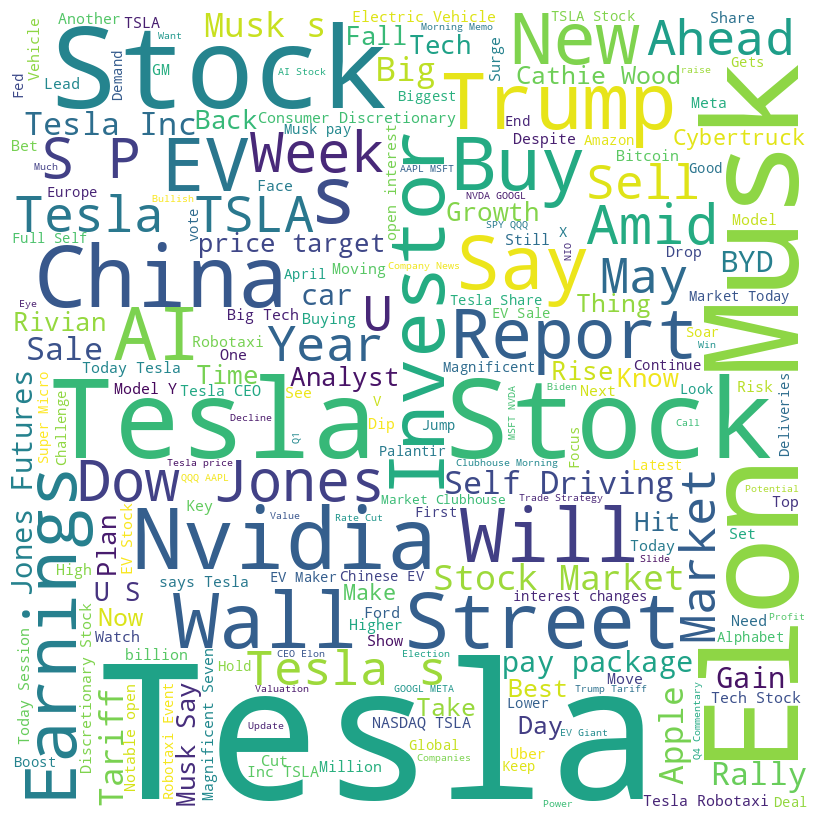

In [ ]:
text = " ".join(review for review in tesla_finn_news.headline.astype(str))

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(text)

# Display the generated image:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


--2025-05-01 12:16:33--  https://raw.githubusercontent.com/sg2083/independent_study/refs/heads/main/multiTimeline.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811 [text/plain]
Saving to: ‘multiTimeline.csv’

multiTimeline.csv   100%[===================>]     811  --.-KB/s    in 0s      

2025-05-01 12:16:33 (46.5 MB/s) - ‘multiTimeline.csv’ saved [811/811]



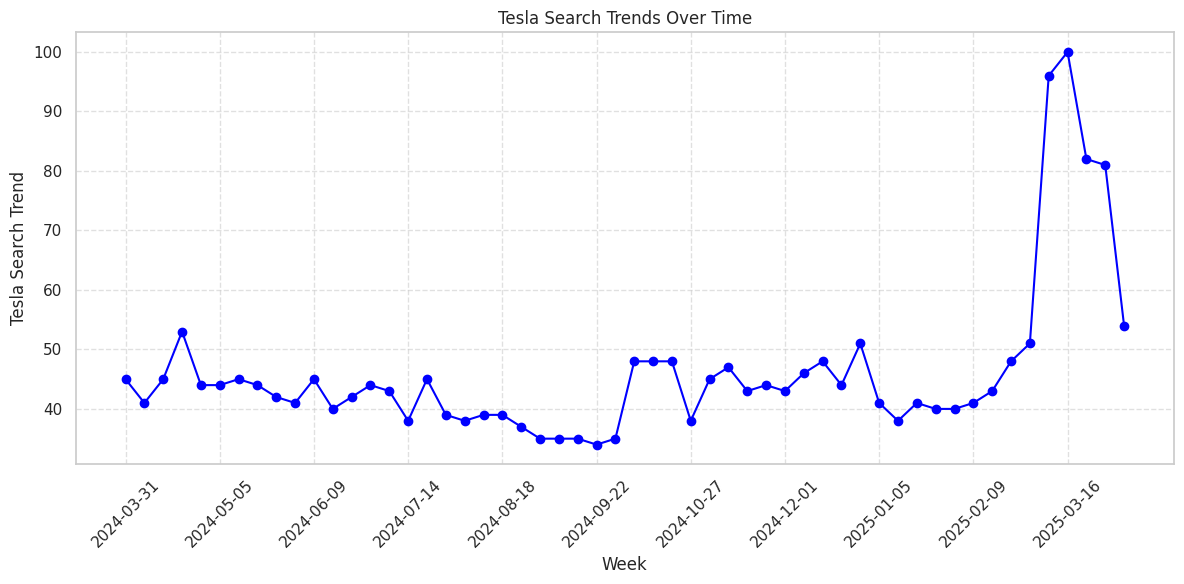

In [ ]:
# Load dataset
!wget https://raw.githubusercontent.com/sg2083/independent_study/refs/heads/main/multiTimeline.csv -O multiTimeline.csv
df = pd.read_csv('multiTimeline.csv', skiprows=2)

# Convert 'Week' column to datetime format
df['Week'] = pd.to_datetime(df['Week'])

# Plot
plt.figure(figsize=(12, 6))  # Adjust figure size

plt.plot(df['Week'], df['tesla: (United States)'], color='blue', marker='o', linestyle='-')

# Improve x-axis labels
plt.xticks(df['Week'][::len(df)//10].dt.strftime('%Y-%m-%d'), rotation=45)

# Labels and title
plt.xlabel('Week')
plt.ylabel('Tesla Search Trend')
plt.title('Tesla Search Trends Over Time')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# Download VADER Lexicon
nltk.download('vader_lexicon')

# Load the processed news data
csv_filename = "tesla_finn_news.csv"
news_df = pd.read_csv(csv_filename)

# Ensure datetime column is in the correct format
news_df['datetime'] = pd.to_datetime(news_df['datetime']).dt.strftime('%Y-%m-%d')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Apply sentiment analysis using only headlines
news_df['headline_sentiment'] = news_df['headline'].apply(get_sentiment)
news_df['final_sentiment'] = news_df['headline_sentiment']

# Save updated data
news_df.to_csv("tesla_finn_news_sentiment.csv", index=False)
print("Sentiment analysis (headline only) completed and saved successfully.")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment analysis (headline only) completed and saved successfully.


In [ ]:
# Load the processed news data with sentiment scores
csv_filename = "tesla_finn_news_sentiment.csv"
news_df = pd.read_csv(csv_filename)

# Ensure datetime column is in the correct format
news_df['datetime'] = pd.to_datetime(news_df['datetime']).dt.strftime('%Y-%m-%d')

# Aggregate sentiment scores per day
aggregated_sentiment = news_df.groupby('datetime')['final_sentiment'].mean().reset_index()
aggregated_sentiment.rename(columns={'datetime': 'Date', 'final_sentiment': 'average_sentiment'}, inplace=True)

# Save the aggregated sentiment data
aggregated_csv_filename = "tesla_aggregated_sentiment.csv"
aggregated_sentiment.to_csv(aggregated_csv_filename, index=False)

print("Aggregated sentiment scores per day saved successfully.")

Aggregated sentiment scores per day saved successfully.


In [ ]:
# Load the aggregated sentiment data
sentiment_filename = "tesla_aggregated_sentiment.csv"
sentiment_df = pd.read_csv(sentiment_filename)

# Load the Tesla stock data
tesla_stock_filename = "tesla_data.csv"
tesla_df = pd.read_csv(tesla_stock_filename)

# Ensure date columns are in the correct format
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

# Merge sentiment data with Tesla stock data on 'Date'
merged_df = pd.merge(tesla_df, sentiment_df, on='Date', how='left')

# Save the merged dataset
merged_csv_filename = "tesla_sentiment_stock.csv"
merged_df.to_csv(merged_csv_filename, index=False)

print("Merged sentiment data with Tesla stock prices successfully saved.")


Merged sentiment data with Tesla stock prices successfully saved.


In [ ]:
print(merged_df.head(5))

        Date        Open        High         Low       Close     Volume  \
0 2024-04-05  169.080002  170.860001  160.509995  164.899994  141250700   
1 2024-04-08  169.339996  174.500000  167.789993  172.979996  104423300   
2 2024-04-09  172.910004  179.220001  171.919998  176.880005  103232700   
3 2024-04-10  173.039993  174.929993  170.009995  171.759995   84532400   
4 2024-04-11  172.550003  175.880005  168.509995  174.600006   94516000   

   Dividends  Stock Splits  average_sentiment  
0        0.0           0.0           0.014115  
1        0.0           0.0           0.095201  
2        0.0           0.0           0.012223  
3        0.0           0.0           0.045186  
4        0.0           0.0           0.057774  


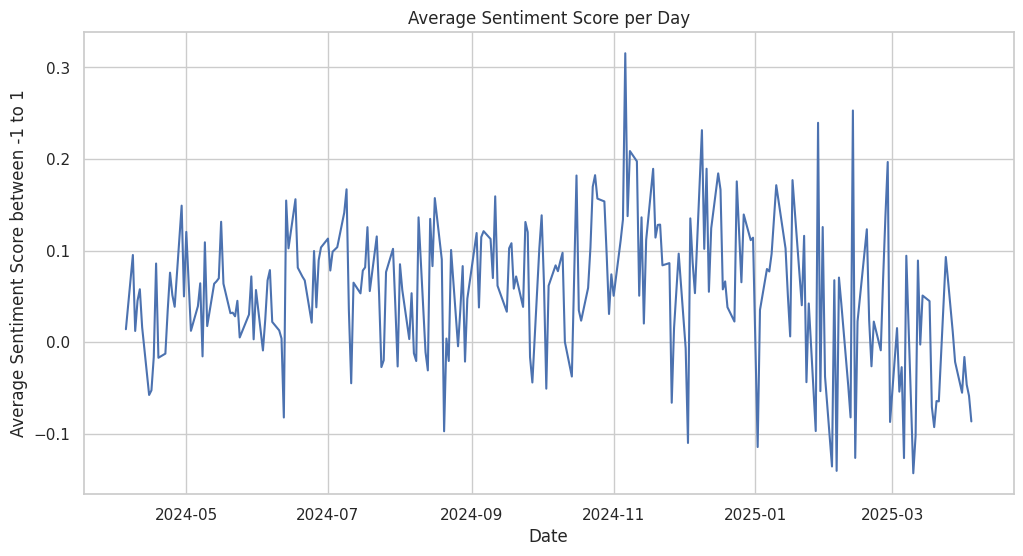

In [ ]:
# Load the merged data
merged_df = pd.read_csv("tesla_sentiment_stock.csv")
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Group by date and calculate average sentiment
average_sentiment_per_day = merged_df.groupby('Date')['average_sentiment'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(average_sentiment_per_day.index, average_sentiment_per_day.values)
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score between -1 to 1')
plt.title('Average Sentiment Score per Day')
plt.grid(True)
plt.show()


<ipython-input-102-c1349c501560>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_counts = sentiment_df.groupby('sentiment_group')['average_sentiment'].count()


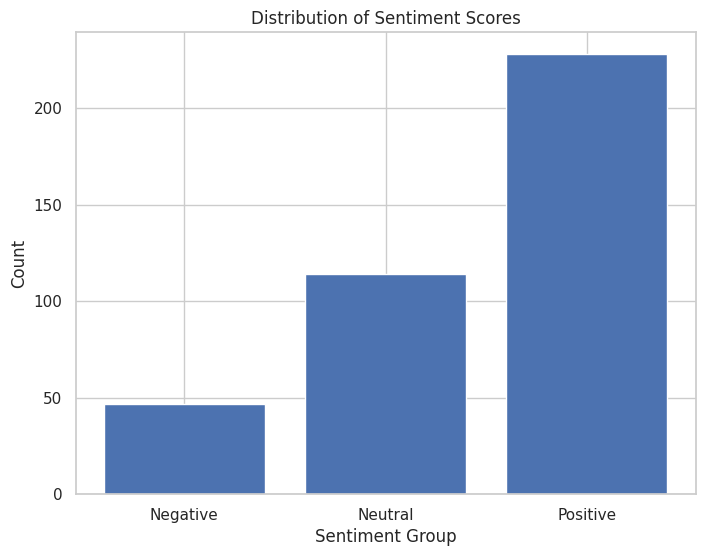

In [ ]:
# Load the aggregated sentiment data
sentiment_filename = "tesla_aggregated_sentiment.csv"
sentiment_df = pd.read_csv(sentiment_filename)

# Define bins for sentiment groups
bins = [-1, -0.05, 0.05, 1]
labels = ['Negative', 'Neutral', 'Positive']

# Categorize sentiment scores into groups
sentiment_df['sentiment_group'] = pd.cut(sentiment_df['average_sentiment'], bins=bins, labels=labels, include_lowest=True)

# Group by sentiment group and count occurrences
sentiment_counts = sentiment_df.groupby('sentiment_group')['average_sentiment'].count()

# Plot bar graph
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Group')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Scores')
plt.show()


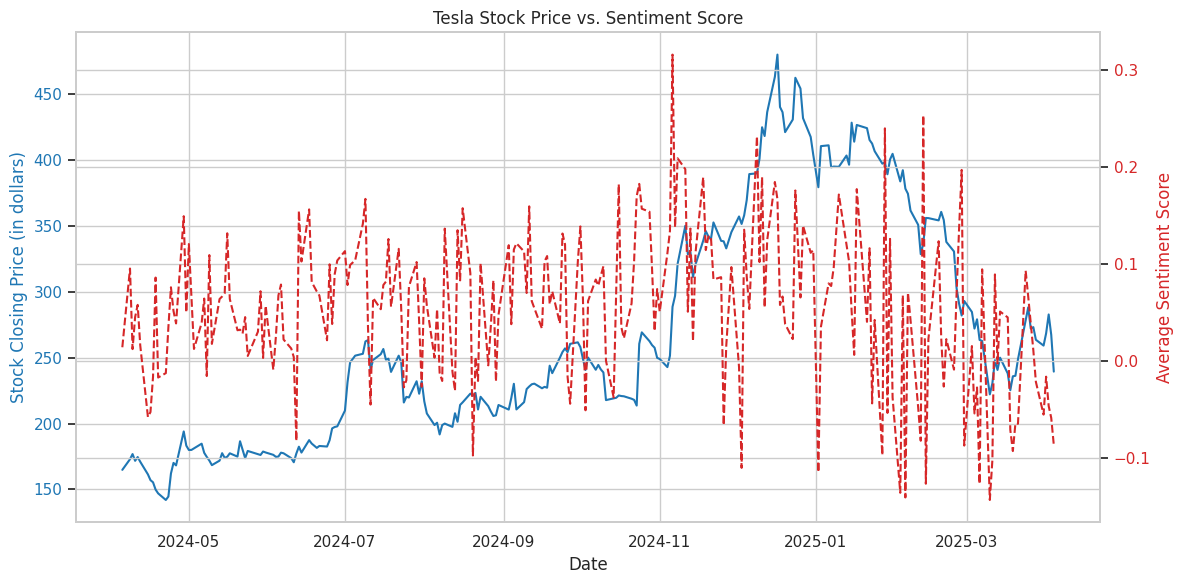

In [ ]:
# Ensure 'Date' is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Sort by Date
merged_df.sort_values(by='Date', inplace=True)

# Plot sentiment vs. closing price
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot stock closing price
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Closing Price (in dollars)', color='tab:blue')
ax1.plot(merged_df['Date'], merged_df['Close'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for sentiment score
ax2 = ax1.twinx()
ax2.set_ylabel('Average Sentiment Score', color='tab:red')
ax2.plot(merged_df['Date'], merged_df['average_sentiment'], color='tab:red', linestyle='dashed', label='Sentiment Score')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and legend
plt.title("Tesla Stock Price vs. Sentiment Score")
fig.tight_layout()
plt.show()


In [ ]:
merged_df['sentiment_ma_5'] = merged_df['average_sentiment'].rolling(window=5).mean()
merged_df['sentiment_ma_10'] = merged_df['average_sentiment'].rolling(window=10).mean()
merged_df['sentiment_ma_30'] = merged_df['average_sentiment'].rolling(window=30).mean()

merged_df.dropna(subset=['sentiment_ma_5', 'sentiment_ma_10', 'sentiment_ma_30'], inplace=True)

In [ ]:
merged_df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,average_sentiment,sentiment_ma_5,sentiment_ma_10,sentiment_ma_30
29,2024-05-16,174.100006,175.789993,171.429993,174.839996,59812200,0.0,0.0,0.131490,0.069802,0.055847,0.043872
30,2024-05-17,173.550003,179.630005,172.750000,177.460007,77445800,0.0,0.0,0.063861,0.079057,0.060991,0.045530
31,2024-05-20,177.559998,177.750000,173.520004,174.949997,61727400,0.0,0.0,0.031630,0.072625,0.060229,0.043411
32,2024-05-21,175.509995,186.880005,174.710007,186.600006,115266500,0.0,0.0,0.032214,0.065790,0.057023,0.044078
33,2024-05-22,182.850006,183.800003,178.119995,180.110001,88313500,0.0,0.0,0.028248,0.057489,0.061401,0.043513


In [ ]:
# Calculate summary statistics for sentiment columns
sentiment_columns = ['average_sentiment', 'sentiment_ma_5', 'sentiment_ma_10', 'sentiment_ma_30']
sentiment_stats = merged_df[sentiment_columns].describe()
print("Summary Statistics for Sentiment Columns:\n", sentiment_stats)

# Calculate summary statistics for stock prices (e.g., 'Close' price)
stock_close_price_stats = merged_df['Close'].describe()
print("\nSummary Statistics for Stock Prices:\n", stock_close_price_stats)

# Correlation between sentiment columns and closing price
correlation = merged_df[sentiment_columns + ['Close']].corr()
print("\nCorrelation between sentiment columns and Closing price:\n", correlation['Close'].sort_values(ascending=False))

Summary Statistics for Sentiment Columns:
        average_sentiment  sentiment_ma_5  sentiment_ma_10  sentiment_ma_30
count         222.000000      222.000000       222.000000       222.000000
mean            0.056624        0.057754         0.058577         0.061123
std             0.080113        0.046870         0.038814         0.027969
min            -0.143159       -0.060928        -0.035550        -0.007436
25%             0.005421        0.031731         0.035851         0.045508
50%             0.063840        0.058933         0.059136         0.061355
75%             0.110133        0.084369         0.083059         0.077485
max             0.315510        0.198659         0.150175         0.118075

Summary Statistics for Stock Prices:
 count    222.000000
mean     277.744595
std       80.707040
min      170.660004
25%      218.190002
50%      250.040001
75%      344.377502
max      479.859985
Name: Close, dtype: float64

Correlation between sentiment columns and Closing pric

#### Observations from Correlation b/w sentiment columns and Closing Price

- The 30-day moving average of sentiment (`sentiment_ma_30`) has the strongest linear relationship with Tesla's stock price.

- This suggests that longer-term sentiment trends align more closely with price movement than short-term or raw daily sentiment.

- The raw average_sentiment has the weakest correlation.

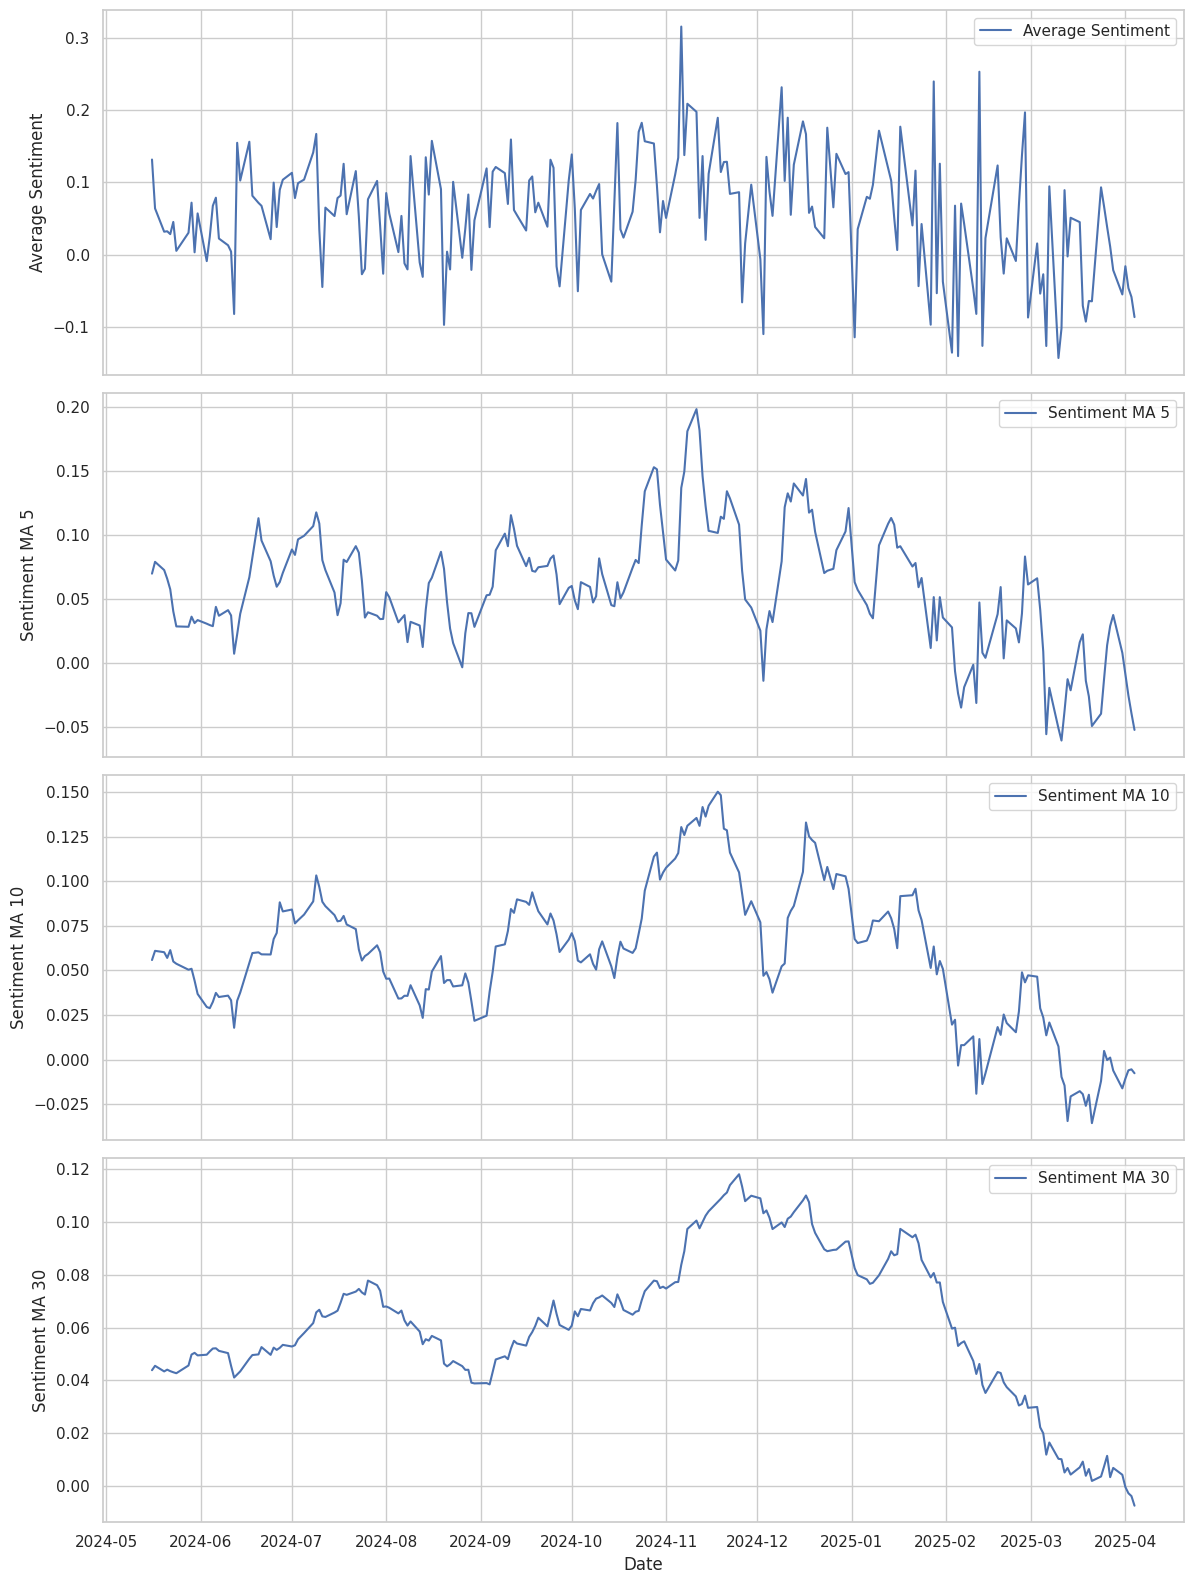

In [ ]:
# Create subplots for each sentiment metric
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

# Plot average_sentiment
axes[0].plot(merged_df['Date'], merged_df['average_sentiment'], label='Average Sentiment')
axes[0].set_ylabel('Average Sentiment')
axes[0].legend()
axes[0].grid(True)

# Plot sentiment_ma_5
axes[1].plot(merged_df['Date'], merged_df['sentiment_ma_5'], label='Sentiment MA 5')
axes[1].set_ylabel('Sentiment MA 5')
axes[1].legend()
axes[1].grid(True)

# Plot sentiment_ma_10
axes[2].plot(merged_df['Date'], merged_df['sentiment_ma_10'], label='Sentiment MA 10')
axes[2].set_ylabel('Sentiment MA 10')
axes[2].legend()
axes[2].grid(True)


# Plot sentiment_ma_30
axes[3].plot(merged_df['Date'], merged_df['sentiment_ma_30'], label='Sentiment MA 30')
axes[3].set_ylabel('Sentiment MA 30')
axes[3].set_xlabel('Date') # X-axis label for the bottom plot
axes[3].legend()
axes[3].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
# updating tesla_sentiment_stock file
merged_df.to_csv("tesla_sentiment_stock.csv", index=False)
print(merged_df.head())


         Date        Open        High         Low       Close     Volume  \
29 2024-05-16  174.100006  175.789993  171.429993  174.839996   59812200   
30 2024-05-17  173.550003  179.630005  172.750000  177.460007   77445800   
31 2024-05-20  177.559998  177.750000  173.520004  174.949997   61727400   
32 2024-05-21  175.509995  186.880005  174.710007  186.600006  115266500   
33 2024-05-22  182.850006  183.800003  178.119995  180.110001   88313500   

    Dividends  Stock Splits  average_sentiment  sentiment_ma_5  \
29        0.0           0.0           0.131490        0.069802   
30        0.0           0.0           0.063861        0.079057   
31        0.0           0.0           0.031630        0.072625   
32        0.0           0.0           0.032214        0.065790   
33        0.0           0.0           0.028248        0.057489   

    sentiment_ma_10  sentiment_ma_30  
29         0.055847         0.043872  
30         0.060991         0.045530  
31         0.060229         0

#### Understanding the relationship between Sentiment Scores and stock prices
Ordinary Least Squares (OLS) regression is used to study the relationship between a dependent variable (Tesla’s stock price) and an independent variable (sentiment score). It finds the best-fitting line by minimizing the differences between actual and predicted values.

For this analysis, I used OLS to see if sentiment data (from news) can help predict Tesla’s stock price.

Before applying OLS, I calculated the Pearson correlation coefficient to check if there is a relationship between sentiment and stock price.

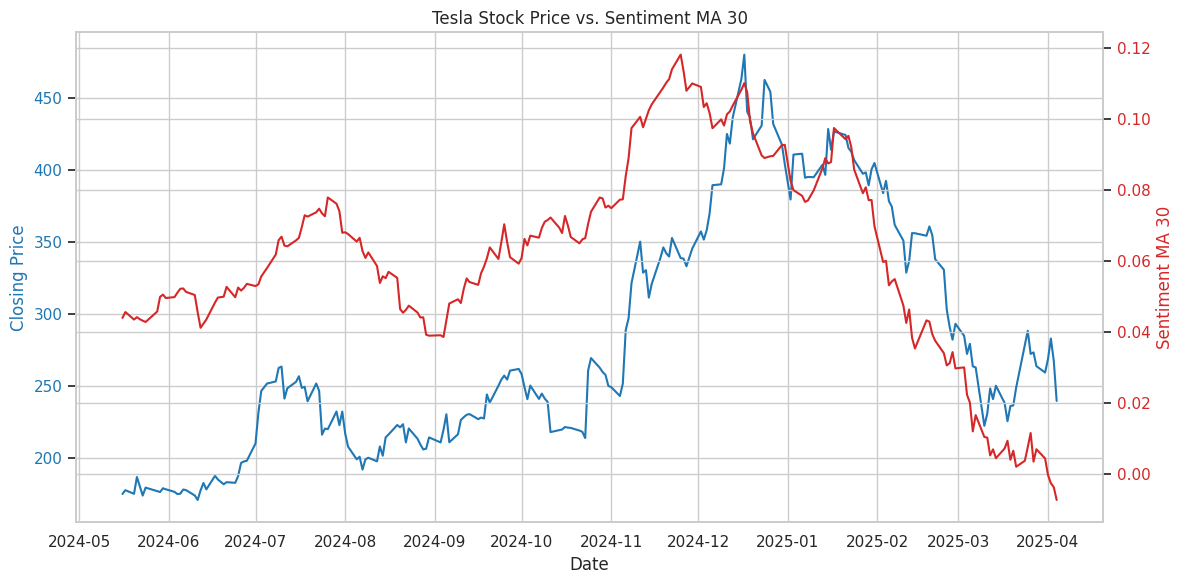

In [ ]:
# # Load the merged data
# merged_df = pd.read_csv("tesla_sentiment_stock.csv")
# merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot stock closing price on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(merged_df['Date'], merged_df['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for sentiment
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Sentiment MA 30', color=color)
ax2.plot(merged_df['Date'], merged_df['sentiment_ma_30'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and show the plot
plt.title('Tesla Stock Price vs. Sentiment MA 30')
fig.tight_layout()
plt.show()


Pearson Correlation: 0.1204, P-value: 0.0733


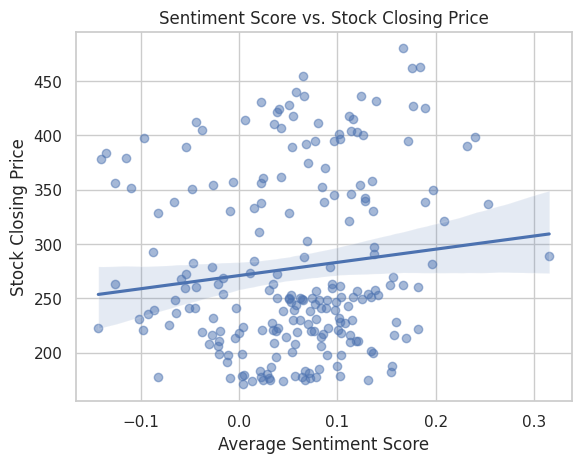

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.238
Date:                Thu, 01 May 2025   Prob (F-statistic):             0.0733
Time:                        12:18:49   Log-Likelihood:                -1287.6
No. Observations:                 222   AIC:                             2579.
Df Residuals:                     220   BIC:                             2586.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               270.8741      6.60

In [ ]:
# Drop rows with missing sentiment scores
merged_df = merged_df.dropna(subset=['average_sentiment'])

# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(merged_df['average_sentiment'], merged_df['Close'])
print(f"Pearson Correlation: {correlation:.4f}, P-value: {p_value:.4f}")

# Scatter plot with regression line
sns.regplot(x=merged_df['average_sentiment'], y=merged_df['Close'], scatter_kws={'alpha':0.5})
plt.xlabel("Average Sentiment Score")
plt.ylabel("Stock Closing Price")
plt.title("Sentiment Score vs. Stock Closing Price")
plt.show()

# Perform Linear Regression
X = merged_df[['average_sentiment']]
X = sm.add_constant(X)  # Add constant for intercept
Y = merged_df['Close']
model = sm.OLS(Y, X).fit()
print(model.summary())


Pearson Correlation: 0.5252, P-value: 0.0000


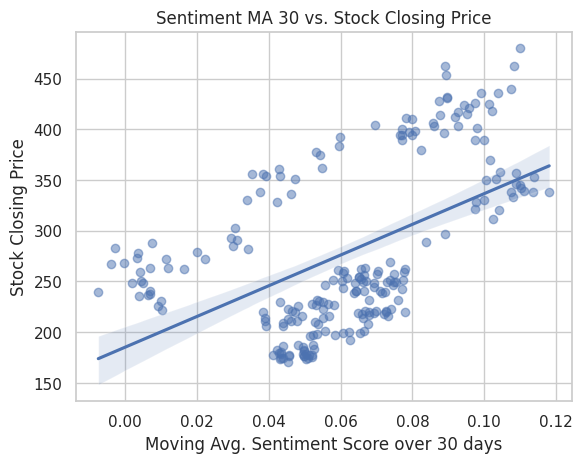

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     83.80
Date:                Thu, 01 May 2025   Prob (F-statistic):           3.86e-17
Time:                        12:18:55   Log-Likelihood:                -1253.4
No. Observations:                 222   AIC:                             2511.
Df Residuals:                     220   BIC:                             2518.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             185.1104     11.124     

In [ ]:
# Drop rows with missing sentiment scores
merged_df = merged_df.dropna(subset=['sentiment_ma_30'])

# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(merged_df['sentiment_ma_30'], merged_df['Close'])
print(f"Pearson Correlation: {correlation:.4f}, P-value: {p_value:.4f}")

# Scatter plot with regression line
sns.regplot(x=merged_df['sentiment_ma_30'], y=merged_df['Close'], scatter_kws={'alpha':0.5})
plt.xlabel("Moving Avg. Sentiment Score over 30 days")
plt.ylabel("Stock Closing Price")
plt.title("Sentiment MA 30 vs. Stock Closing Price")
plt.show()

# Perform Linear Regression
X = merged_df[['sentiment_ma_30']]
X = sm.add_constant(X)  # Add constant for intercept
Y = merged_df['Close']
model = sm.OLS(Y, X).fit()
print(model.summary())


### Pearson Coefficient Results:
- **Pearson correlation** = 0.5252  
- **p-value** = 0.0000  

> The correlation is **moderate and positive**. Since the p-value is well below 0.05, the correlation is **statistically significant**.

Let's analyze the OLS regression results to measure the exact impact of sentiment on stock price.

| Metric                    | Value     | Meaning                                                                 |
|---------------------------|-----------|-------------------------------------------------------------------------|
| **R-squared**             | 0.276     | Sentiment explains **27.6%** of the variation in stock price.          |
| **p-value for Sentiment** | 0.000     | Sentiment has a **highly significant** impact on stock price.          |
| **Sentiment Coefficient** | 1515.53   | A **1-unit increase** in sentiment score is linked to a **$1515.53 increase** in stock price. |

- Sentiment has a **moderate and statistically significant** impact.
- The OLS regression shows that sentiment is a **meaningful predictor** of stock price.
- **R² = 0.276** indicates that sentiment explains a **considerable portion** of the stock price variability, though other factors still play a role.

Other variables like trading volume, macroeconomic trends, or company-specific news may further improve predictive power.


#### Random Forest Regression Analysis of Stock Prices

Random Forest builds multiple decision trees and combines their results to improve accuracy and reduce overfitting.

Given that OLS regression showed weak predictive power (R² = 0.276) and stock prices are affected by multiple factors, Random Forest is a better alternative to improve accuracy and capture non-linear relationship between stock prices and sentiment scores.

Random Forest Regression - MAE: 28.3399, MSE: 1273.2205, RMSE: 35.6822, R² Score: 0.8036


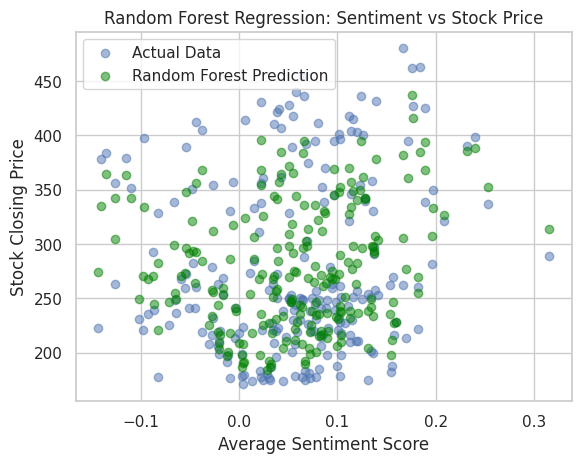

In [ ]:
X = merged_df[['average_sentiment']]
Y = merged_df['Close']

# Define and train the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X, Y)

# Predictions
Y_pred_rf = rf_reg.predict(X)

# Evaluate model
mae_rf = mean_absolute_error(Y, Y_pred_rf)
mse_rf = mean_squared_error(Y, Y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(Y, Y_pred_rf)

print(f"Random Forest Regression - MAE: {mae_rf:.4f}, MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, R² Score: {r2_rf:.4f}")

# Plot results
plt.scatter(X['average_sentiment'], Y, alpha=0.5, label="Actual Data")
plt.scatter(X['average_sentiment'], Y_pred_rf, color='green', alpha=0.5, label="Random Forest Prediction")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Stock Closing Price")
plt.title("Random Forest Regression: Sentiment vs Stock Price")
plt.legend()
plt.show()


#### Analyzing Random Forest Rgression Results

| Metric                     | Value  | Meaning                                              |
|----------------------------|--------|------------------------------------------------------|
| R-squared                 | 0.8036  | Model explains 80% of stock price variations.     |
| Mean Absolute Error (MAE)  | 28.34  | On average, the prediction is $28.34 off from the actual price. |
| Mean Squared Error (MSE)   | 1273.22  | Measures error magnitude (lower is better).         |
| Root Mean Squared Error (RMSE) | 35.68  | The model’s average prediction error is 35.68.    |

- R² = 0.8036 means the model captures 80% of stock price fluctuations, significantly better than OLS. This suggests that sentiment scores have a strong non-linear relationship with stock prices, which Random Forest effectively models.
- MAE = 28.34 means the model's average absolute prediction error is around $28.
- RMSE = 35.68 confirms relatively small errors but suggests a few larger mispredictions (higher RMSE than MAE).

Limitation:
- MSE = 1273.22 is high, meaning some large errors exist in the predictions.



Random Forest Regression - MAE: 13.8730, MSE: 439.7451, RMSE: 20.9701, R² Score: 0.9322


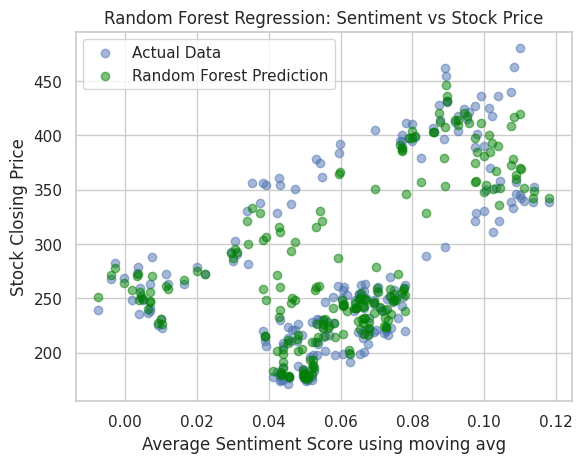

In [ ]:
X = merged_df[['sentiment_ma_30']]
Y = merged_df['Close']

# Define and train the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X, Y)

# Predictions
Y_pred_rf = rf_reg.predict(X)

# Evaluate model
mae_rf = mean_absolute_error(Y, Y_pred_rf)
mse_rf = mean_squared_error(Y, Y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(Y, Y_pred_rf)

print(f"Random Forest Regression - MAE: {mae_rf:.4f}, MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, R² Score: {r2_rf:.4f}")

# Plot results
plt.scatter(X['sentiment_ma_30'], Y, alpha=0.5, label="Actual Data")
plt.scatter(X['sentiment_ma_30'], Y_pred_rf, color='green', alpha=0.5, label="Random Forest Prediction")
plt.xlabel("Average Sentiment Score using moving avg")
plt.ylabel("Stock Closing Price")
plt.title("Random Forest Regression: Sentiment vs Stock Price")
plt.legend()
plt.show()

### Random Forest Regression Results

| Features Used              | MAE      | MSE       | RMSE     | R² Score |
|---------------------------|----------|-----------|----------|----------|
| average_sentiment       | 28.34  | 1273.22 | 35.68  | 0.80   |
| sentiment_ma_30         | 13.87  | 439.75  | 20.97  | 0.93   |

#### Interpretation
- When using `average_sentiment` alone, the model performs reasonably well, explaining about **80%** of the variance in stock prices.
- However, the error metrics (MAE = 28.34 and RMSE = 35.68) are relatively higher, indicating **less precise predictions**.
- With `sentiment_ma_30` (30-day moving average of sentiment), the model achieves **significantly better performance**.
- **R² Score improves to 0.93**, suggesting the model explains **93%** of the variation in Tesla's stock prices.
- **MAE and RMSE are both substantially reduced** (13.87 and 20.97 respectively), indicating much more **accurate and stable predictions**.

#### Conclusion
The results clearly show that smoothing sentiment through a moving average (in this case, 30-day) leads to **better predictive power**. This implies that **short-term sentiment noise may be misleading**, while **long-term sentiment trends**, captured by moving averages, are more reflective of how the stock actually moves.

#### Clustering for Random Forest

Grouping the data into 3 clusters based on:
- Sentiment moving average(30-day)
- Stock closing price

We are using K-Means to group Tesla data into:
- Days with high prices and high sentiment
- Days with low prices but still positive sentiment
- Days with medium prices and neutral sentiment

And then training the Random Forest regression model separately for each cluster.

This often improves performance because each model focuses on a more specific data pattern.

#### Why do we need to use clustering with Random Forest?
It helps deal with non-linear patterns that vary across the dataset and also improves accuracy in datasets with shifting behavior or trends.

#### Methods to choose the optimal k:

1. Elbow method:
- The goal of the Elbow method is to identify the point where the inertia (sum of squared distances from each point to its assigned cluster center) starts to level off as the number of clusters increases. This point resembles an "elbow" in the plot.

- The "elbow" point is often chosen as the optimal k. This is the point where increasing k further yields diminishing returns in terms of reducing inertia.

2. Silhoette score method:
- The Silhouette Score measures how well each point fits into its assigned cluster compared to other clusters.

- The optimal value of k is usually the one with the highest average silhouette score, as it indicates the best balance of cohesion and separation.

- A higher silhouette score indicates that the points are well-clustered, with minimal overlap between clusters.

- A lower silhouette score suggests poor clustering, with points that may not be clearly assigned to any cluster.

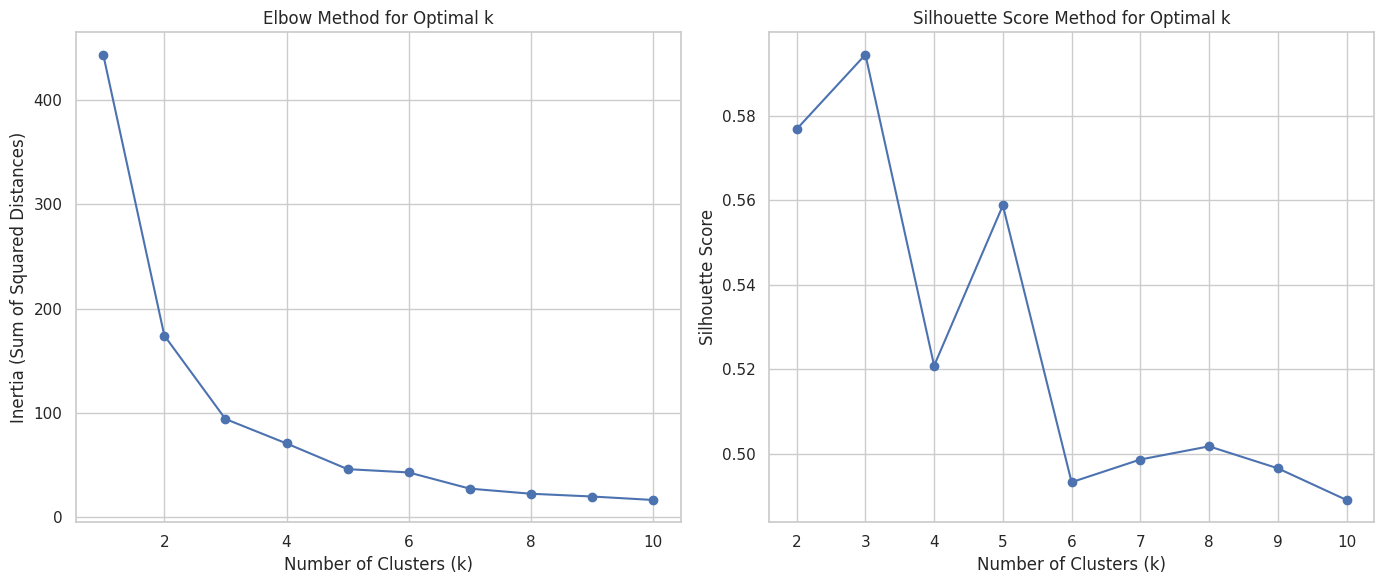

In [ ]:
# 1. Select features
clustering_features = merged_df[['sentiment_ma_30', 'Close']]

# 2. Standardize the features (z-scores)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# 3. Finding the optimal k using Elbow method and Silhoette scores
# Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Silhouette Score Method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

# Create subplots for both methods
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Elbow Method plot
ax[0].plot(K_range, inertia, marker='o')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Inertia (Sum of Squared Distances)')
ax[0].set_title('Elbow Method for Optimal k')
ax[0].grid(True)

# Silhouette Score plot
ax[1].plot(range(2, 11), silhouette_scores, marker='o')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette Score Method for Optimal k')
ax[1].grid(True)

plt.tight_layout()
plt.show()

#### Interpretation

Both Elbow method and silhoette score method is used to determine the optimal number of clusters 'k'.

1. Elbow Method: The plot shows a sharp drop in inertia until k = 3 and then a gradual flattening out, so **k = 3** would be the optimal choice. This is because adding more clusters beyond 3 provides marginal reductions in inertia, indicating that the model is fitting noise rather than real patterns.

2. Silhoette Score Method: Silhoette score is highest for k=3, so **k=3** would be selected as the optimal k value. This provides the best separation and cohesion among clusters.





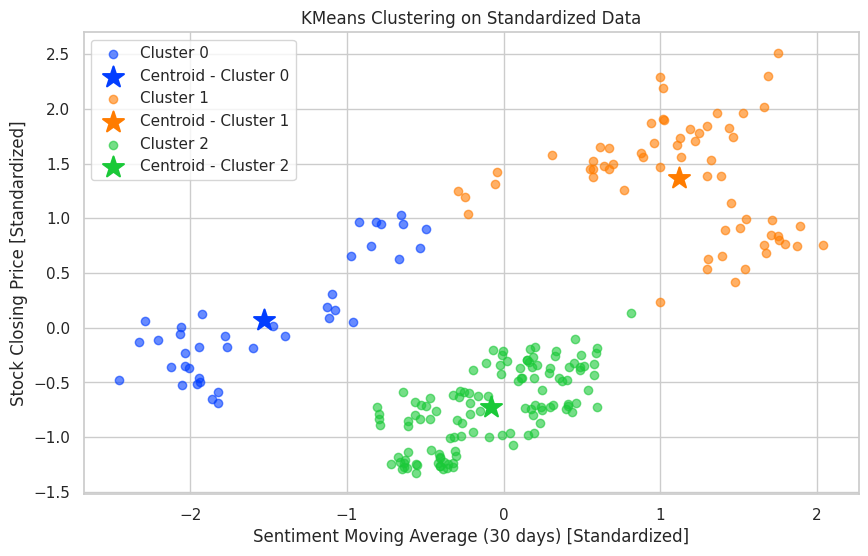

In [ ]:
# 3. Apply KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to DataFrame
merged_df['cluster'] = clusters

# 4. Visualize clusters using scaled features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette("bright", k)

# Extract scaled features into separate variables for plotting
x_scaled = scaled_features[:, 0]
y_scaled = scaled_features[:, 1]

# Plot data points and centroids
for cluster in range(k):
    cluster_mask = (clusters == cluster)

    # Plot cluster data points
    plt.scatter(
        x_scaled[cluster_mask],
        y_scaled[cluster_mask],
        label=f'Cluster {cluster}',
        alpha=0.6,
        color=palette[cluster]
    )

    # Plot centroids (already in scaled space)
    plt.scatter(
        kmeans.cluster_centers_[cluster][0],
        kmeans.cluster_centers_[cluster][1],
        marker='*',
        s=250,
        linewidths=1.5,
        color=palette[cluster],
        label=f'Centroid - Cluster {cluster}'
    )

plt.xlabel('Sentiment Moving Average (30 days) [Standardized]')
plt.ylabel('Stock Closing Price [Standardized]')
plt.title('KMeans Clustering on Standardized Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\n=== Cluster-wise Statistics ===")
for cluster in range(k):
    cluster_data = merged_df[merged_df['cluster'] == cluster]
    X_cluster = cluster_data[['sentiment_ma_30']]
    y_true = cluster_data['Close']
    y_pred = rf_reg.predict(X_cluster)

    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\nCluster {cluster} - Size: {len(cluster_data)}")
    print(f"Mean Close Price: {y_true.mean():.2f}")
    print(f"Mean Sentiment MA(30): {cluster_data['sentiment_ma_30'].mean():.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("\nClose Price Summary:")
    print(y_true.describe())
    print("\nSentiment MA(30) Summary:")
    print(cluster_data['sentiment_ma_30'].describe())


=== Cluster-wise Statistics ===

Cluster 0 - Size: 39
Mean Close Price: 283.68
Mean Sentiment MA(30): 0.0185
MSE: 482.67
R² Score: 0.72

Close Price Summary:
count     39.000000
mean     283.675641
std       42.333965
min      222.149994
25%      249.345001
50%      273.130005
75%      315.649994
max      360.559998
Name: Close, dtype: float64

Sentiment MA(30) Summary:
count    39.000000
mean      0.018468
std       0.016532
min      -0.007436
25%       0.004736
50%       0.011434
75%       0.034087
max       0.047364
Name: sentiment_ma_30, dtype: float64

Cluster 1 - Size: 62
Mean Close Price: 388.03
Mean Sentiment MA(30): 0.0924
MSE: 729.77
R² Score: 0.57

Close Price Summary:
count     62.000000
mean     388.034999
std       41.357858
min      296.910004
25%      351.705009
50%      394.839996
75%      416.834999
max      479.859985
Name: Close, dtype: float64

Sentiment MA(30) Summary:
count    62.000000
mean      0.092413
std       0.015550
min       0.053066
25%       0.083295


#### Analysis and Interpretation of the RF clusters:

🟦 Cluster 0 – Neutral Sentiment, Mid Price

Sentiment (MA30): Mean = 0.0185 → Near neutral; a mix of slightly positive and even negative values.

Close Price: Mean = $283.68 → Mid-range pricing; not the lowest, not the highest.

R² Score: 0.72 → Strong model performance; explains a good amount of price variance.

Interpretation:

- This cluster reflects neutral or mixed sentiment with moderately priced stocks.

- Possibly represents periods of market consolidation or indecision.

- Despite muted sentiment, the Random Forest model captures the trend quite well here — likely due to lower noise and more stable patterns.

🟥 Cluster 1 – High Sentiment, High Price
Sentiment (MA30): Mean = 0.0924 → Highest sentiment among all clusters.

Close Price: Mean = $388.03 → Clearly the highest stock prices.

R² Score: 0.57 → Moderate model performance.

Interpretation:

- Represents strongly bullish market behavior, with high sentiment and stock prices.

- Likely corresponds to periods following positive news, earnings beats, or strong market momentum.

- The Random Forest model does a fair job, but the higher MSE suggests more volatility or rapid changes not entirely captured by sentiment alone.

🟩 Cluster 2 – Moderate Sentiment, Low Price

Sentiment (MA30): Mean = 0.0588 → Moderately positive; higher than Cluster 0, lower than Cluster 1.

Close Price: Mean = $219.32 → Lowest stock prices across clusters.

R² Score: 0.66 → Good model performance, better than Cluster 1.

Interpretation:

- Interesting cluster: moderate sentiment but low stock prices.

- May reflect recovering markets or over-optimism, where sentiment is rising before price catches up.

- The model performs well despite this sentiment-price gap, possibly due to clearer underlying patterns in these lower price ranges.

#### 📌 Key Observations

1. Cluster 1 (High Sentiment & High Price):

  - Most clearly shows bullish sentiment-price correlation.

  - Model handles it moderately well, though with more error likely due to volatility.

2. Cluster 0 (Neutral Sentiment & Mid Price):

  - Displays stable sentiment and prices.

  - The model fits this cluster best — possibly due to less noise and fewer outliers.

3. Cluster 2 (Moderate Sentiment & Low Price):

  - Appears to be a recovery or transitional phase.

  - The RF model still performs well, indicating that price behavior here may be more predictable than it seems.

#### XGBoost Regressor Analysis (Extreme Gradient Boosting)

XGBoost is a powerful machine learning algorithm based on decision trees. It builds multiple trees sequentially, where each tree learns from the mistakes of the previous one, improving predictions over time.

- It captures non-linear relationships between sentiment scores and stock prices.
- It can handle missing data and outliers better than linear models.
- Helps in checking if sentiment scores actually impact stock prices or if the effect is weak.


XGBoost R² Score: -0.4159
XGBoost RMSE: 94.0483


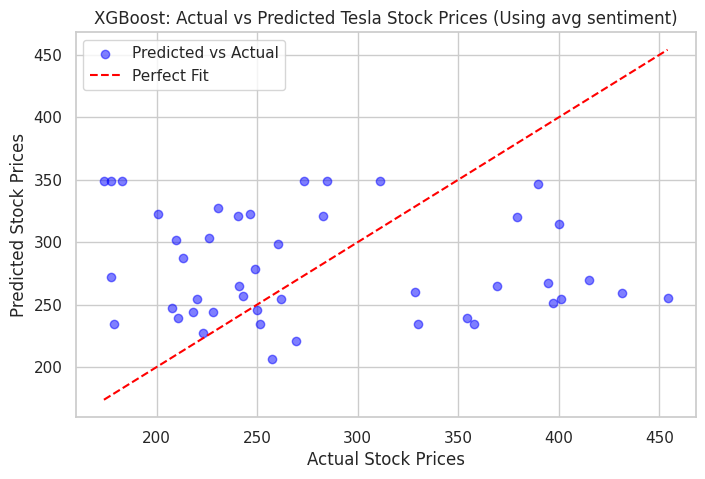

In [ ]:
df = pd.read_csv("tesla_sentiment_stock.csv")  # Replace with your actual filename

# Define features (X) and target (y)
X = df[['average_sentiment']]  # Feature: Sentiment Score
y = df['Close']  # Target: Stock Closing Price

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=100,
                             learning_rate=0.1,
                             max_depth=3,
                             random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"XGBoost R² Score: {r2:.4f}")
print(f"XGBoost RMSE: {rmse:.4f}")

# Plot Actual vs. Predicted Prices
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Stock Prices")
plt.ylabel("Predicted Stock Prices")
plt.title("XGBoost: Actual vs Predicted Tesla Stock Prices (Using avg sentiment)")
plt.legend()
plt.show()


XGBoost Regressor Analysis Results (For Average Sentiment Scores):
- XGBoost R² score is -0.42, meaning the model performs worse than a simple mean baseline (it is not able to capture the relationship between sentiment and stock prices effectively).

- RMSE is 94.04, which is quite high, indicating that the predicted stock prices deviate significantly from the actual prices. This could suggest that XGBoost is struggling to fit the data properly and is not capturing the underlying patterns in stock prices.

XGBoost R² Score: 0.7055
XGBoost RMSE: 42.8920


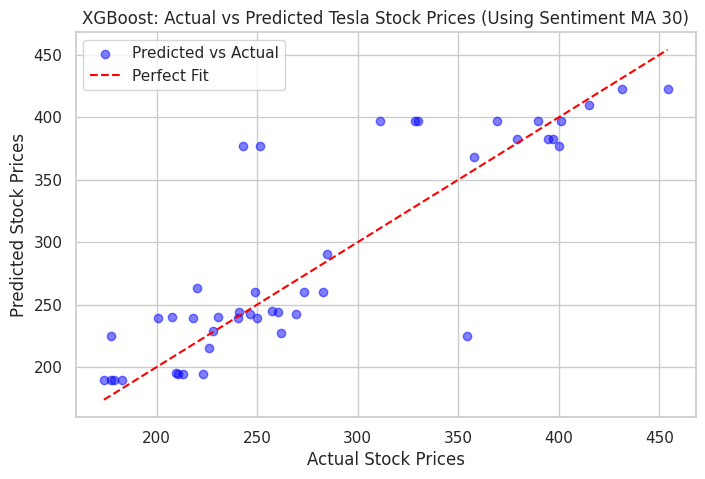

In [ ]:
# Define features (X) and target (y)
X = df[['sentiment_ma_30']]  # Feature: Sentiment Score
y = df['Close']  # Target: Stock Closing Price

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=100,
                             learning_rate=0.1,
                             max_depth=3,
                             random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"XGBoost R² Score: {r2:.4f}")
print(f"XGBoost RMSE: {rmse:.4f}")

# Plot Actual vs. Predicted Prices
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Stock Prices")
plt.ylabel("Predicted Stock Prices")
plt.title("XGBoost: Actual vs Predicted Tesla Stock Prices (Using Sentiment MA 30)")
plt.legend()
plt.show()


XGBoost Regressor Analysis Results (For Sentiment Moving Average over 30 days)

- About 71% of the variation in Tesla's closing stock price can be explained by the 30-day moving average of sentiment. This is a significant improvement over the previous R² (~–0.42), which showed no meaningful predictive power.

- The average prediction error is about $42.89, which is much lower than the previous RMSE (~94.05), meaning the predictions are much closer to the actual prices.

#### Conclusion

Using a 30-day moving average of sentiment (instead of raw daily sentiment) smooths out noise and reveals a more stable trend — one that is more strongly correlated with stock price movements. This makes it a much better input feature for regression models like XGBoost.

### LSTM
LSTM (Long Short-Term Memory) is a type of neural network designed to handle sequential data like time-series stock prices. Unlike regular neural networks, LSTM remembers past data over long sequences, making it great for predicting trends.

#### Steps involved in building a LSTM model:

- Load and Prepare Data: Load Tesla stock prices and sentiment scores from a CSV file.
The dataset is sorted by date and set as the index.

- Normalize Data: Since LSTM models work better with small values (between 0 and 1), we scale both sentiment scores and stock prices.

- Create Sequences (Past Data as Input): Stock prices depend on previous trends, so we group past 10 days of sentiment scores to predict the next day’s stock price.

- Split into Training & Testing Data: Use 80% of data for training (teaching the model) and 20% for testing (checking accuracy).

- Dropout layers prevent overfitting (memorizing instead of learning).

- Dense layers generate the final predicted stock price.

- Train the Model: The model learns from training data by adjusting itself to minimize prediction errors.

- Make Predictions: Predict stock prices on the test data and convert them back to real prices.

- Plot Actual vs Predicted Prices: Visualize how well our model predicts stock prices based on sentiment scores.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - loss: 0.1494 - val_loss: 0.0244
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0797 - val_loss: 0.0449
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0643 - val_loss: 0.0404
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0693 - val_loss: 0.0343
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0766 - val_loss: 0.0480
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0668 - val_loss: 0.0341
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0658 - val_loss: 0.0437
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0651 - val_loss: 0.0393
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0691 - val_loss: 0.0501
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0569 - val_loss: 0.0434
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0715 - val_loss: 0.0624
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0

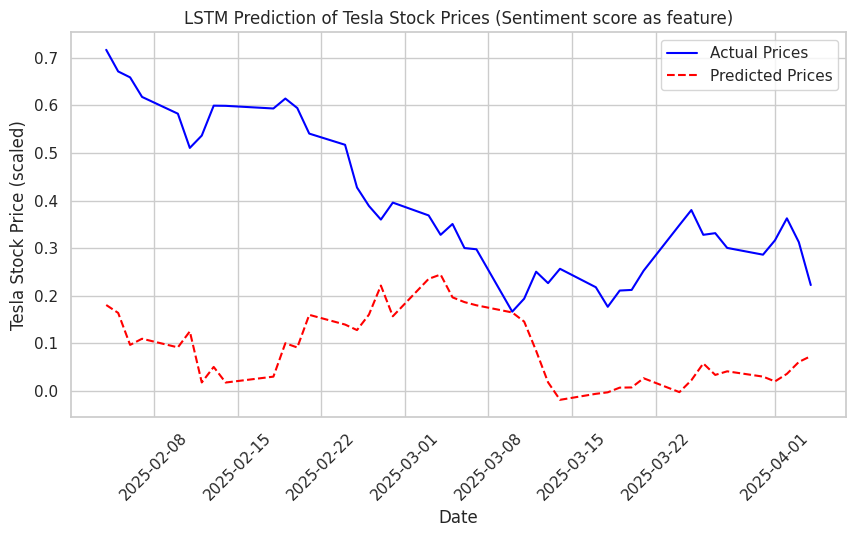

In [ ]:
# Load Dataset
df = pd.read_csv("tesla_sentiment_stock.csv", parse_dates=["Date"])
df = df.sort_values(by="Date")
df.set_index("Date", inplace=True)

# Select Features and Target
features = ['average_sentiment']
target = ['Close']

# Normalize Data (LSTM works better with scaled data)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
df[features] = scaler_x.fit_transform(df[features])
df[target] = scaler_y.fit_transform(df[target])

# Create Sequences (LSTM needs past data for predictions)
def create_sequences(data, target, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(target[i + window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(df[features].values, df[target].values, window_size)

# Split into Train & Test
split = int(0.8 * len(X))  # 80% Training, 20% Testing
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM (Batch size, Time steps, Features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], len(features)))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], len(features)))

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # Output layer for stock price prediction
])

# Compile Model
model.compile(optimizer='adam', loss='mse')

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predict
y_pred = model.predict(X_test)

# Rescale Back to Original Price Scale
y_test_inv = y_test
y_pred_inv = y_pred

# Extract Dates for the Test Set
test_dates = df.index[-len(y_test_inv):]

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10,5))
plt.plot(test_dates, y_test_inv, label="Actual Prices", color="blue")
plt.plot(test_dates, y_pred_inv, label="Predicted Prices", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Tesla Stock Price (scaled)")
plt.title("LSTM Prediction of Tesla Stock Prices (Sentiment score as feature)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"LSTM RMSE: {rmse}")

# Calculate R-squared
r2 = r2_score(y_test_inv, y_pred_inv)
print(f"LSTM R-squared: {r2}")


LSTM RMSE: 0.3417800682169029
LSTM R-squared: -3.807434582809244


#### Interpretation of single-feature LSTM model

Interpretation:
- The plot shows that there is a large difference in the actual prices and predicted prices.

- The **Root Mean Squared Error (RMSE)** of **96.90** indicates that the model’s predictions are **quite far from the actual stock prices**, on average.

- The **R² score of -3.04** is a strong indicator of **poor model performance**. An R² score below 0 means the model is performing **worse than a simple mean-based model**, i.e., it's introducing more error than just predicting the average stock price every time.

Conclusion:

The LSTM model **failed to capture the underlying patterns** in the data effectively. This could be due to:
- Inadequate feature selection or scaling,
- Overfitting or underfitting,
- A need for more historical data or longer training,
- Improper tuning of model architecture or hyperparameters.

Overall, these results suggest the LSTM model, in its current form, is **not suitable for reliable stock price prediction** based on sentiment data alone and would require significant refinement.

Let's try using both sentiment_score and closing price as features for training and testing the data.


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.1548 - val_loss: 0.0097
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0355 - val_loss: 0.0080
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0164 - val_loss: 0.0100
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0129 - val_loss: 0.0150
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0104 - val_loss: 0.0150
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0101 - val_loss: 0.0064
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0095 - val_loss: 0.0140
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0077 - val_loss: 0.0103
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0069 - val_loss: 0.0103
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0071 - val_loss: 0.0105
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0078 - val_loss: 0.0097
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0064 - val_l

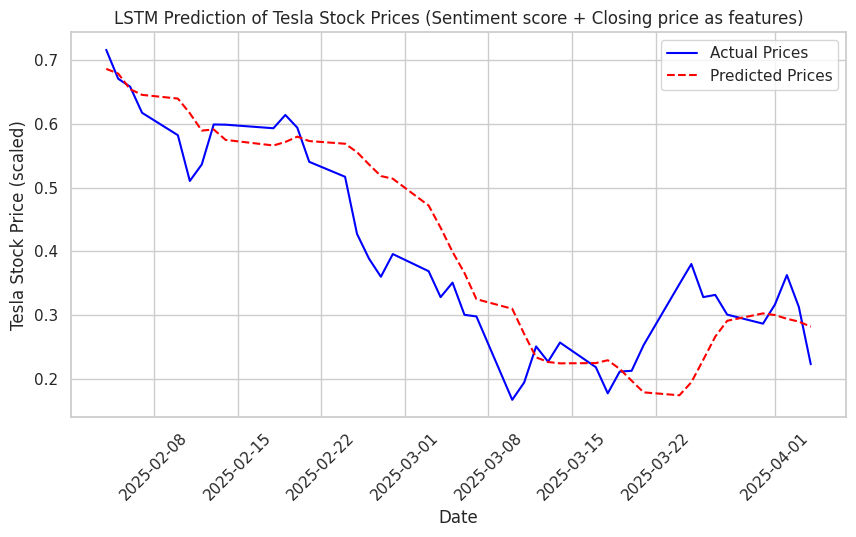

LSTM RMSE: 0.07751747907264972
LSTM R-squared: 0.7527027992713736


In [ ]:
# Select features and target
features = ['average_sentiment', 'Close']  # Include both sentiment and close price
target = ['Close']

# Normalize data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
df[features] = scaler_x.fit_transform(df[features])
df[target] = scaler_y.fit_transform(df[target])

# Create sequences
def create_sequences(data, target, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(target[i + window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(df[features].values, df[target].values, window_size)

# Split into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], len(features)))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], len(features)))

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predict
y_pred = model.predict(X_test)

# Inverse transform to get actual values
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler_y.inverse_transform(y_pred)

# Get the dates for the test set
test_dates = df.index[-len(y_test_inv):]

#Plot
plt.figure(figsize=(10,5))
plt.plot(test_dates, y_test_inv, label="Actual Prices", color="blue")
plt.plot(test_dates, y_pred_inv, label="Predicted Prices", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Tesla Stock Price (scaled)")
plt.title("LSTM Prediction of Tesla Stock Prices (Sentiment score + Closing price as features)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"LSTM RMSE: {rmse}")
r2 = r2_score(y_test_inv, y_pred_inv)
print(f"LSTM R-squared: {r2}")


#### Interpretation of double feature LSTM model (sentiment score + closing price)

- **RMSE:** 0.07  
- **R² Score:** 0.75  
> A dramatic performance boost. RMSE dropped substantially, and the R² score indicates the model now explains around **75%** of the variance in stock prices.

Interpretation:

- Adding `close` as a feature significantly improved the model’s ability to capture trends and dynamics in the data.
- The model now delivers **reasonably accurate predictions** and demonstrates a **meaningful understanding** of the relationship between sentiment and stock prices.
- This suggests that **including historical price context** (e.g., `close`) helps the LSTM model better contextualize sentiment information.

Conclusion:

- Incorporating both `average_sentiment` and `close` into the LSTM model architecture leads to **much better predictive performance**.

- It validates the importance of combining **emotional signals (sentiment)** with **quantitative price history** when modeling stock behavior.

- However, the model still struggles with extreme fluctuations, suggesting the need for additional indicators such as trading volume and fine-tuning the parameters for accurate and best results.

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.1541 - val_loss: 0.0093
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0320 - val_loss: 0.0062
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0209 - val_loss: 0.0058
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0109 - val_loss: 0.0107
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0104 - val_loss: 0.0082
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0093 - val_loss: 0.0090
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0088 - val_loss: 0.0065
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0082 - val_loss: 0.0064
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0078 - val_loss: 0.0062
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0080 - val_loss: 0.0077
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0070 - val_l

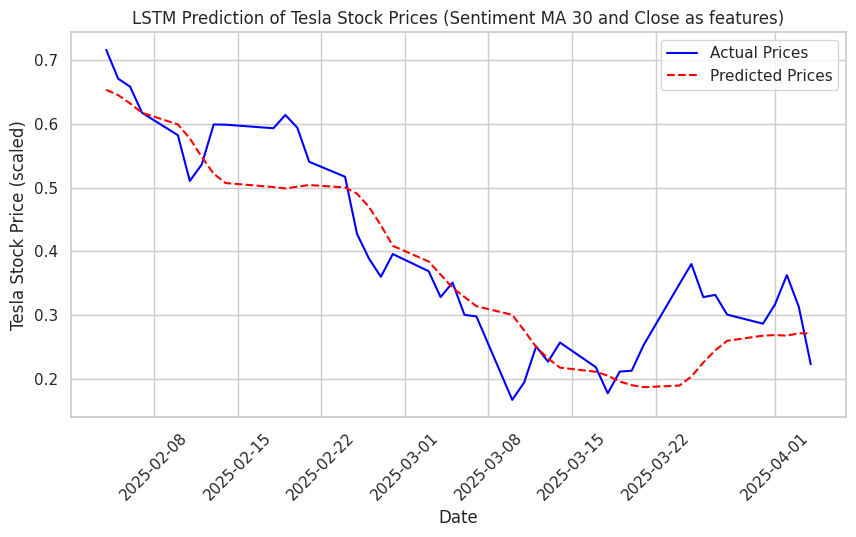

LSTM RMSE: 0.06836311360601469
LSTM R-squared: 0.8076626677476997


In [ ]:
# Load Dataset
df = pd.read_csv("tesla_sentiment_stock.csv", parse_dates=["Date"])
df = df.sort_values(by="Date")
df.set_index("Date", inplace=True)

# Select Features and Target
features = ['sentiment_ma_30', "Close"]
target = ['Close']

# Normalize Data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
df[features] = scaler_x.fit_transform(df[features])
df[target] = scaler_y.fit_transform(df[target])

# Create Sequences
def create_sequences(data, target, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(target[i + window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(df[features].values, df[target].values, window_size)

# Split into Train & Test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], len(features)))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], len(features)))

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile Model
model.compile(optimizer='adam', loss='mse')

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predict
y_pred = model.predict(X_test)

# Rescale Back
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler_y.inverse_transform(y_pred)

# Extract Dates
test_dates = df.index[-len(y_test_inv):]

# Plot
plt.figure(figsize=(10,5))
plt.plot(test_dates, y_test_inv, label="Actual Prices", color="blue")
plt.plot(test_dates, y_pred_inv, label="Predicted Prices", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Tesla Stock Price (scaled)")
plt.title("LSTM Prediction of Tesla Stock Prices (Sentiment MA 30 and Close as features)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"LSTM RMSE: {rmse}")
r2 = r2_score(y_test_inv, y_pred_inv)
print(f"LSTM R-squared: {r2}")


#### Analysis of RMSE and R² values of LSTM model (with `average_sentiment` and `sentiment_ma_30` as features along with `Close`):

| Features Used                    | RMSE     | R² Score  |
|----------------------------------|----------|-----------|
| `average_sentiment + Close`      | 0.07     | 0.75      |
| `sentiment_ma_30 + Close`        | 0.06     | **0.80**  |

Interpretation:

- **Including `Close` (historical price)** significantly enhances the model’s performance. This confirms that recent stock price behavior is a **crucial input** for accurate future predictions.
  
- The combination of `sentiment_ma_30 + Close` leads to:
  - A **lower RMSE (0.06)**, meaning **more accurate predictions** on average.
  - A **higher R² score (0.80)**, showing the model can explain about **80% of the variance** in stock prices — a strong result in financial time series forecasting.

- Compared to `average_sentiment + Close`, the **smoothed sentiment feature (`sentiment_ma_30`)** delivers better results. This suggests that:
  - **Raw sentiment can be noisy**, potentially reacting to temporary spikes in emotional tone.
  - A moving average helps reduce this noise and allows the LSTM to **learn more stable, trend-based patterns**.

- The LSTM model benefits from features that reflect **both emotional market trends (sentiment)** and **recent price momentum (close)**.

Conclusion:
- Using `sentiment_ma_30` with `Close` creates a more robust and insightful input combination for the LSTM model.
- It balances **long-term sentiment trends** with **short-term price dynamics**, enabling the model to **more effectively capture market behavior** and improve predictive power.

In [ ]:
!wget https://raw.githubusercontent.com/sg2083/independent_study/refs/heads/main/tesla_reddit_year.csv -O tesla_reddit_year.csv
tesla_reddit = pd.read_csv('tesla_reddit_year.csv')
print(tesla_reddit.columns)

--2025-05-01 12:23:32--  https://raw.githubusercontent.com/sg2083/independent_study/refs/heads/main/tesla_reddit_year.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1716728 (1.6M) [text/plain]
Saving to: ‘tesla_reddit_year.csv’

tesla_reddit_year.c 100%[===================>]   1.64M  --.-KB/s    in 0.07s   

2025-05-01 12:23:32 (23.4 MB/s) - ‘tesla_reddit_year.csv’ saved [1716728/1716728]

Index(['id', 'title', 'selftext', 'created_utc', 'subreddit', 'url'], dtype='object')


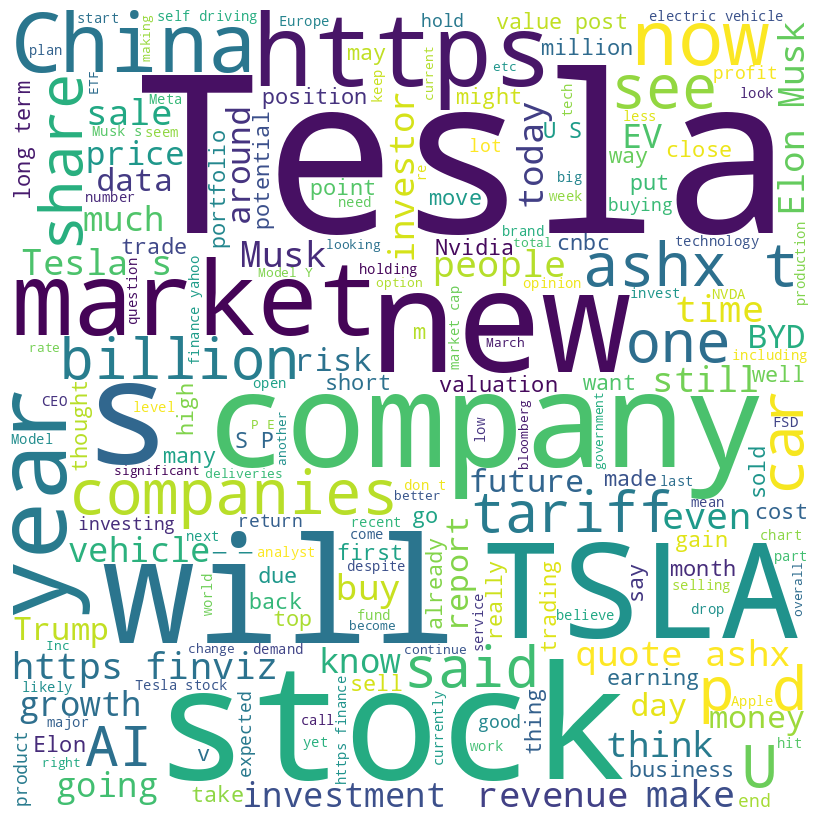

In [ ]:
combined_text = " ".join((tesla_reddit['title'].fillna('') + " " + tesla_reddit['selftext'].fillna('')).astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(combined_text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Ensure 'created_utc' is in datetime format and normalize to date only
tesla_reddit['created_utc'] = pd.to_datetime(tesla_reddit['created_utc']).dt.strftime('%Y-%m-%d')

# Define a function to compute compound sentiment from title + selftext
def get_combined_sentiment(row):
    combined_text = f"{row['title']} {row['selftext']}" if pd.notna(row['selftext']) else row['title']
    return sia.polarity_scores(combined_text)['compound']

# Apply sentiment analysis
tesla_reddit['combined_sentiment'] = tesla_reddit.apply(get_combined_sentiment, axis=1)
# Aggregate by date (mean sentiment)
daily_reddit_sentiment = tesla_reddit.groupby('created_utc')['combined_sentiment'].mean().reset_index()
daily_reddit_sentiment.rename(columns={'created_utc': 'Date', 'combined_sentiment': 'average_sentiment_reddit'}, inplace=True)

# Load Tesla stock data
tesla_df = tesla_data
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

# Merge sentiment with stock data
daily_reddit_sentiment['Date'] = pd.to_datetime(daily_reddit_sentiment['Date'])
merged_reddit_stock_df = pd.merge(tesla_df, daily_reddit_sentiment, on='Date', how='left')
merged_reddit_stock_df['average_sentiment_reddit'][0] = 0
merged_reddit_stock_df['average_sentiment_reddit'] = merged_reddit_stock_df['average_sentiment_reddit'].fillna(method='ffill')
merged_reddit_stock_df.to_csv("tesla_reddit_sentiment_stock.csv")
merged_reddit_stock_df = merged_reddit_stock_df[merged_reddit_stock_df['Date'] >= pd.Timestamp('2024-04-25')]

merged_reddit_stock_df['reddit_sentiment_ma_30'] = merged_reddit_stock_df['average_sentiment_reddit'].rolling(window=30).mean()

merged_reddit_stock_df.dropna(subset=['reddit_sentiment_ma_30'], inplace=True)

print(merged_reddit_stock_df.head())


         Date        Open        High         Low       Close    Volume  \
43 2024-06-06  174.600006  179.729996  172.729996  177.940002  69887000   
44 2024-06-07  176.130005  179.350006  175.580002  177.479996  56244900   
45 2024-06-10  176.059998  178.570007  173.169998  173.789993  50869700   
46 2024-06-11  173.919998  174.750000  167.410004  170.660004  64761900   
47 2024-06-12  171.119995  180.550003  169.800003  177.289993  90389400   

    Dividends  Stock Splits  average_sentiment_reddit  reddit_sentiment_ma_30  
43        0.0           0.0                   0.00475                0.314514  
44        0.0           0.0                  -0.26920                0.305540  
45        0.0           0.0                  -0.90790                0.275277  
46        0.0           0.0                   0.42150                0.287597  
47        0.0           0.0                   0.59970                0.278780  


<ipython-input-126-8f181f24ec17>:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged_reddit_stock_df['average_sentiment_reddit'][0] = 0
<ipython-input-126-8f181f24ec17>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy 

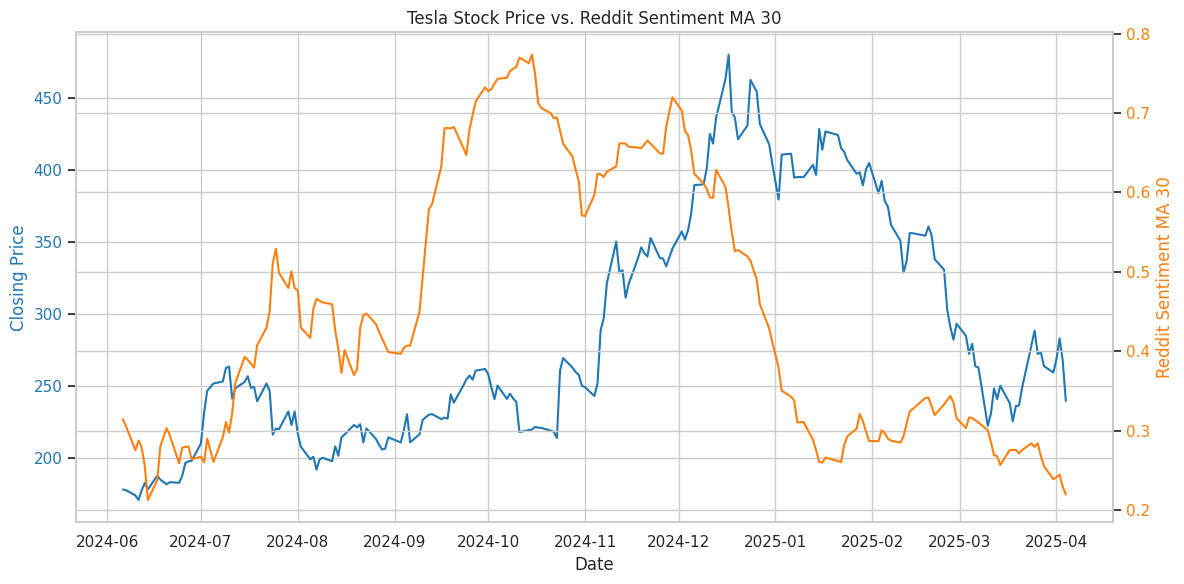

In [ ]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot stock closing price on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(merged_reddit_stock_df['Date'], merged_reddit_stock_df['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for sentiment
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Reddit Sentiment MA 30', color=color)
ax2.plot(merged_reddit_stock_df['Date'], merged_reddit_stock_df['reddit_sentiment_ma_30'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and show the plot
plt.title('Tesla Stock Price vs. Reddit Sentiment MA 30')
fig.tight_layout()
plt.show()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.1077 - val_loss: 0.0093
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0481 - val_loss: 0.0060
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0184 - val_loss: 0.0198
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121 - val_loss: 0.0129
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0104 - val_loss: 0.0093
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0116 - val_loss: 0.0142
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0091 - val_loss: 0.0076
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0095 - val_loss: 0.0126
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0091 - val_loss: 0.0079
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081 - val_loss: 0.0080
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0084 - val_loss: 0.0113
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0074 - val_l

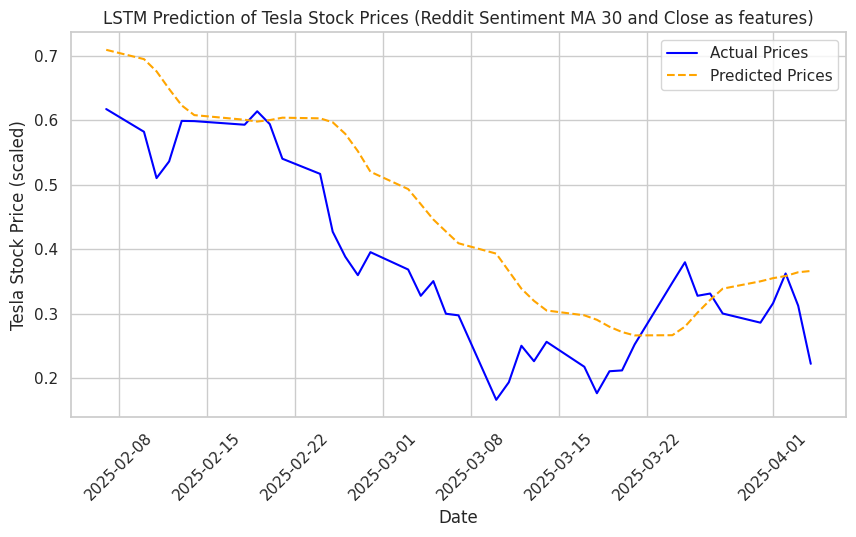

LSTM RMSE: 0.10500551620848494
LSTM R-squared: 0.43038599614379314


In [ ]:
# Load Dataset
merged_reddit_stock_df['Date'] = pd.to_datetime(merged_reddit_stock_df['Date'])
merged_reddit_stock_df = merged_reddit_stock_df.sort_values(by="Date")
merged_reddit_stock_df['Close_original'] = merged_reddit_stock_df['Close']
# Select features and target
features = ['reddit_sentiment_ma_30', 'Close']  # Include both sentiment and close price
target = ['Close']

# Normalize Data (LSTM works better with scaled data)
scaler_x2 = MinMaxScaler()
scaler_y2 = MinMaxScaler()
merged_reddit_stock_df[features] = scaler_x2.fit_transform(merged_reddit_stock_df[features])
merged_reddit_stock_df[target] = scaler_y2.fit_transform(merged_reddit_stock_df[target])

# Create Sequences (LSTM needs past data for predictions)
def create_sequences(data, target, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(target[i + window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(merged_reddit_stock_df[features].values, merged_reddit_stock_df[target].values, window_size)

# Split into Train & Test
split = int(0.8 * len(X))  # 80% Training, 20% Testing
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM (Batch size, Time steps, Features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], len(features)))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], len(features)))

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # Output layer for stock price prediction
])

# Compile Model
model.compile(optimizer='adam', loss='mse')

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predict
y_pred = model.predict(X_test)

# Rescale Back to Original Price Scale
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler_y.inverse_transform(y_pred)

# Extract Dates for the Test Set
test_dates = merged_reddit_stock_df['Date'].values[-len(y_test_inv):]

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10,5))
plt.plot(test_dates, y_test_inv, label="Actual Prices", color="blue")
plt.plot(test_dates, y_pred_inv, label="Predicted Prices", color="orange", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Tesla Stock Price (scaled)")
plt.title("LSTM Prediction of Tesla Stock Prices (Reddit Sentiment MA 30 and Close as features)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"LSTM RMSE: {rmse}")

# Calculate R-squared
r2 = r2_score(y_test_inv, y_pred_inv)
print(f"LSTM R-squared: {r2}")



In [ ]:
Finn_sentiment_filename = "tesla_aggregated_sentiment.csv"
Finn_sentiment_df = pd.read_csv(sentiment_filename)

copy_tesla_stockprice = tesla_data.copy()
copy_tesla_stockprice['Date'] = pd.to_datetime(copy_tesla_stockprice['Date'])

daily_reddit_sentiment['Date'] = pd.to_datetime(daily_reddit_sentiment['Date'])
Finn_sentiment_df['Date'] = pd.to_datetime(Finn_sentiment_df['Date'])

# --- Merge Tesla and Reddit Sentiment
tesla_reddit = pd.merge(copy_tesla_stockprice, daily_reddit_sentiment, on='Date', how='left')

# --- Merge the above with Finnhub Sentiment
final_merged_df_reddit_finn = pd.merge(tesla_reddit, Finn_sentiment_df, on='Date', how='left')

# --- Fill missing sentiment values with 0 (neutral)
final_merged_df_reddit_finn['average_sentiment_reddit'] = final_merged_df_reddit_finn['average_sentiment_reddit'].fillna(0)
final_merged_df_reddit_finn['average_sentiment'] = final_merged_df_reddit_finn['average_sentiment'].fillna(0)
final_merged_df_reddit_finn.rename(columns={'average_sentiment': 'average_sentiment_finn'}, inplace=True)

final_merged_df_reddit_finn['combined_sentiment'] = ((0.3*final_merged_df_reddit_finn['average_sentiment_reddit']) + (0.7*final_merged_df_reddit_finn['average_sentiment_finn'])) / 2
final_merged_df_reddit_finn['combined_sentiment_ma_30'] = final_merged_df_reddit_finn['combined_sentiment'].rolling(window=30).mean()

final_merged_df_reddit_finn.dropna(subset=['combined_sentiment_ma_30'], inplace=True)

# --- Final preview
print(final_merged_df_reddit_finn.head())

         Date        Open        High         Low       Close     Volume  \
29 2024-05-16  174.100006  175.789993  171.429993  174.839996   59812200   
30 2024-05-17  173.550003  179.630005  172.750000  177.460007   77445800   
31 2024-05-20  177.559998  177.750000  173.520004  174.949997   61727400   
32 2024-05-21  175.509995  186.880005  174.710007  186.600006  115266500   
33 2024-05-22  182.850006  183.800003  178.119995  180.110001   88313500   

    Dividends  Stock Splits  average_sentiment_reddit  average_sentiment_finn  \
29        0.0           0.0                   0.90005                0.131490   
30        0.0           0.0                   0.00000                0.063861   
31        0.0           0.0                   0.00000                0.031630   
32        0.0           0.0                   0.00000                0.032214   
33        0.0           0.0                   0.00000                0.028248   

    combined_sentiment  combined_sentiment_ma_30  
29   

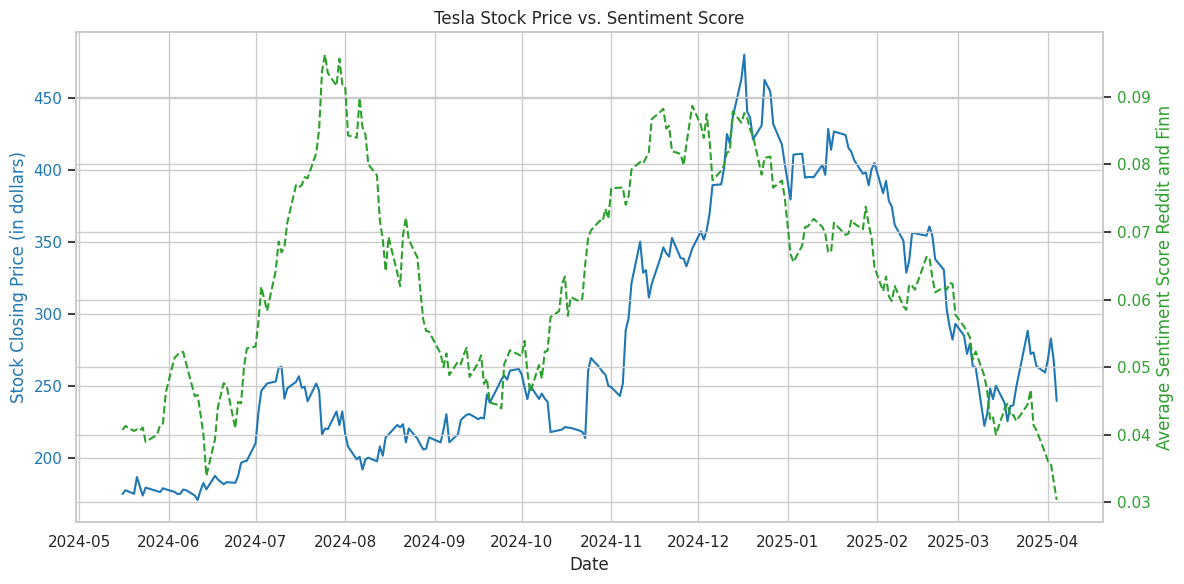

In [ ]:
final_merged_df_reddit_finn.sort_values(by='Date', inplace=True)

# Plot sentiment vs. closing price
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot stock closing price
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Closing Price (in dollars)', color='tab:blue')
ax1.plot(final_merged_df_reddit_finn['Date'], final_merged_df_reddit_finn['Close'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for sentiment score
ax2 = ax1.twinx()
ax2.set_ylabel('Average Sentiment Score Reddit and Finn', color='tab:green')
ax2.plot(final_merged_df_reddit_finn['Date'], final_merged_df_reddit_finn['combined_sentiment_ma_30'], color='tab:green', linestyle='dashed', label='Sentiment Score')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Add title and legend
plt.title("Tesla Stock Price vs. Sentiment Score")
fig.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

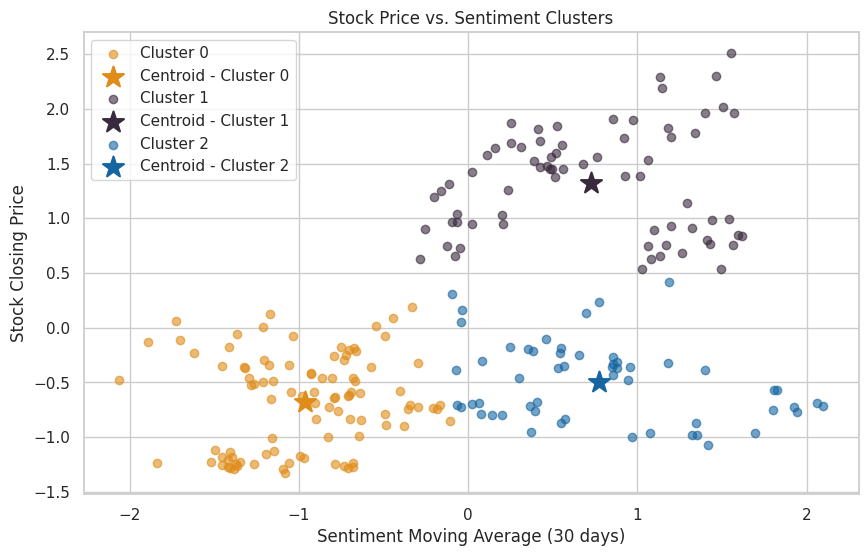

In [ ]:
# Features for clustering
clustering_features_combined_data = final_merged_df_reddit_finn[['combined_sentiment_ma_30', 'Close']]

# 2. Standardize the features (z-scores)
scaler = StandardScaler()
scaled_features_combined = scaler.fit_transform(clustering_features_combined_data)

# Perform KMeans clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
final_merged_df_reddit_finn['cluster'] = kmeans.fit_predict(scaled_features_combined)

# Use scaled values for plotting
x_scaled = scaled_features_combined[:, 0]
y_scaled = scaled_features_combined[:, 1]

# Visualize clusters
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette(["#df8c18","#38293c","#1565a1"], k)
plt.figure(figsize=(10, 6))

# Plot each cluster and its centroid with matching color
for cluster in range(k):
    cluster_mask = (final_merged_df_reddit_finn['cluster'] == cluster)

    # Plot scaled data points
    plt.scatter(
        x_scaled[cluster_mask],
        y_scaled[cluster_mask],
        label=f'Cluster {cluster}',
        alpha=0.6,
        color=palette[cluster]
    )

    # Plot centroids (already scaled)
    plt.scatter(
        kmeans.cluster_centers_[cluster, 0],
        kmeans.cluster_centers_[cluster, 1],
        marker='*',
        color=palette[cluster],
        s=250,
        linewidths=1.5,
        label=f'Centroid - Cluster {cluster}'
    )

plt.xlabel('Sentiment Moving Average (30 days)')
plt.ylabel('Stock Closing Price')
plt.title('Stock Price vs. Sentiment Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
final_merged_df_reddit_finn['scaled_sentiment'] = scaled_features_combined[:, 0]
final_merged_df_reddit_finn['scaled_close'] = scaled_features_combined[:, 1]

cluster_stats = final_merged_df_reddit_finn.groupby('cluster').agg({
    'scaled_sentiment': ['mean', 'std', 'min', 'max'],
    'scaled_close': ['mean', 'std', 'min', 'max'],
    'combined_sentiment_ma_30': ['mean', 'min', 'max'],
    'Close': ['mean', 'min', 'max'],
    'Date': 'count'
}).rename(columns={'Date': 'Count'})

print(cluster_stats)

        scaled_sentiment                               scaled_close            \
                    mean       std       min       max         mean       std   
cluster                                                                         
0              -0.963290  0.422168 -2.064442 -0.107806    -0.677246  0.426161   
1               0.728501  0.585461 -0.287183  1.621581     1.325741  0.490807   
2               0.771710  0.628432 -0.098297  2.099722    -0.492891  0.361587   

                            combined_sentiment_ma_30                      \
              min       max                     mean       min       max   
cluster                                                                    
0       -1.329829  0.189201                 0.264435  0.000000  0.469875   
1        0.533690  2.509969                 0.670709  0.426799  0.885177   
2       -1.067799  0.415217                 0.681086  0.472158  1.000000   

            Close                     Count  
          

#### Interpretation of combined sentiment scores:

1. Cluster 0:
- Sentiment: Predominantly negative, with a mean sentiment of -0.96. Sentiment ranges from very negative to slightly negative.

- Stock Price: Low average stock price with a mean of 0.17 (scaled), ranging from 0 to 0.40.

- Behavior: Likely represents periods of low stock prices and negative sentiment. This could be associated with bearish market conditions or generally poor sentiment around the stock.

2. Cluster 1:
- Sentiment: Strongly positive, with a mean sentiment of 0.73. Sentiment values range from negative to highly positive.

- Stock Price: High average stock price with a mean of 0.69 (scaled), ranging from 0.49 to 1.00.

- Behavior: This cluster represents periods of strong positive sentiment and higher stock prices, potentially indicating bullish market conditions or favorable news driving stock performance.

3. Cluster 2:
- Sentiment: Positive, with a mean sentiment of 0.77. The sentiment ranges from negative to highly positive.

- Stock Price: Low average stock price with a mean of 0.22 (scaled), ranging from 0.07 to 0.45.

- Behavior: This cluster is characterized by positive sentiment but lower stock prices, which may indicate optimism without a corresponding rise in stock value. It could reflect temporary optimism or external market factors affecting stock performance.

Overall Interpretation:

- Cluster 0: Represents a period of negative sentiment and low stock prices.

- Cluster 1: Corresponds to periods with positive sentiment and high stock prices, indicating favorable market conditions.

- Cluster 2: Represents a combination of positive sentiment with lower stock prices, possibly reflecting temporary optimism or external factors.

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.1761 - val_loss: 0.0317
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0437 - val_loss: 0.0091
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0330 - val_loss: 0.0070
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0158 - val_loss: 0.0073
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0112 - val_loss: 0.0177
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0102 - val_loss: 0.0117
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0106 - val_loss: 0.0096
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0095 - val_loss: 0.0105
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0105 - val_loss: 0.0112
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0114 - val_loss: 0.0067
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0091 - val_loss: 0.0227
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0108 - val_l

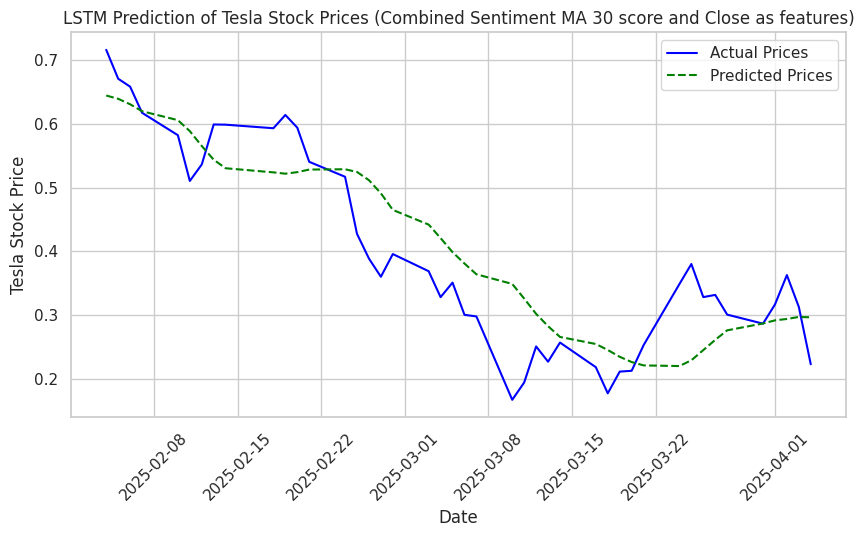

LSTM RMSE: 0.07496347273988503
LSTM R-squared: 0.7687299928733992


In [ ]:
# Load Dataset
final_merged_df_reddit_finn = final_merged_df_reddit_finn.sort_values(by="Date")

# Select features and target
features = ['combined_sentiment_ma_30', 'Close']  # Include both sentiment and close price
target = ['Close']

# Normalize Data (LSTM works better with scaled data)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
final_merged_df_reddit_finn[features] = scaler_x.fit_transform(final_merged_df_reddit_finn[features])
final_merged_df_reddit_finn[target] = scaler_y.fit_transform(final_merged_df_reddit_finn[target])

# Create Sequences (LSTM needs past data for predictions)
def create_sequences(data, target, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(target[i + window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(final_merged_df_reddit_finn[features].values, final_merged_df_reddit_finn[target].values, window_size)

# Split into Train & Test
split = int(0.8 * len(X))  # 80% Training, 20% Testing
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM (Batch size, Time steps, Features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], len(features)))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], len(features)))

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # Output layer for stock price prediction
])

# Compile Model
model.compile(optimizer='adam', loss='mse')

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predict
y_pred = model.predict(X_test)

# Rescale Back to Original Price Scale
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler_y.inverse_transform(y_pred)

# Extract Dates for the Test Set
test_dates = final_merged_df_reddit_finn['Date'].values[-len(y_test_inv):]

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10,5))
plt.plot(test_dates, y_test_inv, label="Actual Prices", color="blue")
plt.plot(test_dates, y_pred_inv, label="Predicted Prices", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Tesla Stock Price")
plt.title("LSTM Prediction of Tesla Stock Prices (Combined Sentiment MA 30 score and Close as features)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"LSTM RMSE: {rmse}")

# Calculate R-squared
r2 = r2_score(y_test_inv, y_pred_inv)
print(f"LSTM R-squared: {r2}")



#### Interpretation of LSTM model(with combined_sentiment_ma_30 and close as features):

- Root Mean Squared Error (RMSE = 0.07):
This low RMSE value suggests that the model's predictions are close to actual stock prices on average. It indicates the model is well-calibrated and makes only small errors across the test data.

- R-squared (R² ~ 0.77): An R² of approximately 76.87% means that the model can explain nearly 77% of the variance in the actual stock prices, which reflects strong predictive power. It implies that a significant portion of the fluctuations in stock price can be attributed to the input features — in this case, combined_sentiment_ma_30 and historical Close prices.

Limtations:
- As compared with previous model where we used `news sentiment + closing price`, this model does not exceed its performance because:
  1. Reddit Sentiment Added Noise:

    - Reddit data is often noisier, more volatile, and less consistent than news sentiment.

    - Including it might have diluted the signal from the cleaner, more formal news sentiment.

    - Especially if the Reddit sentiment wasn’t well-aligned with price movements (e.g., hype, sarcasm, irony), it can hurt predictive power.

  2. Data Quality or Coverage

    - If your Reddit sentiment data had gaps, inconsistent timestamps, or fewer meaningful entries, it might have misaligned with stock prices.

    - News sentiment is usually more stable and event-driven, better capturing influential macro events.